In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# EDA

In [5]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Data Visualization 

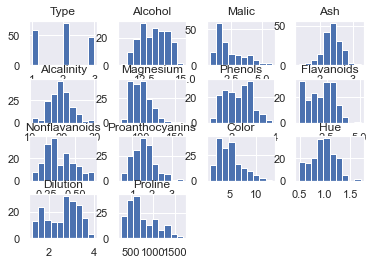

In [7]:
# histogram 
df.hist()
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.dpi'] = 300

<AxesSubplot:>

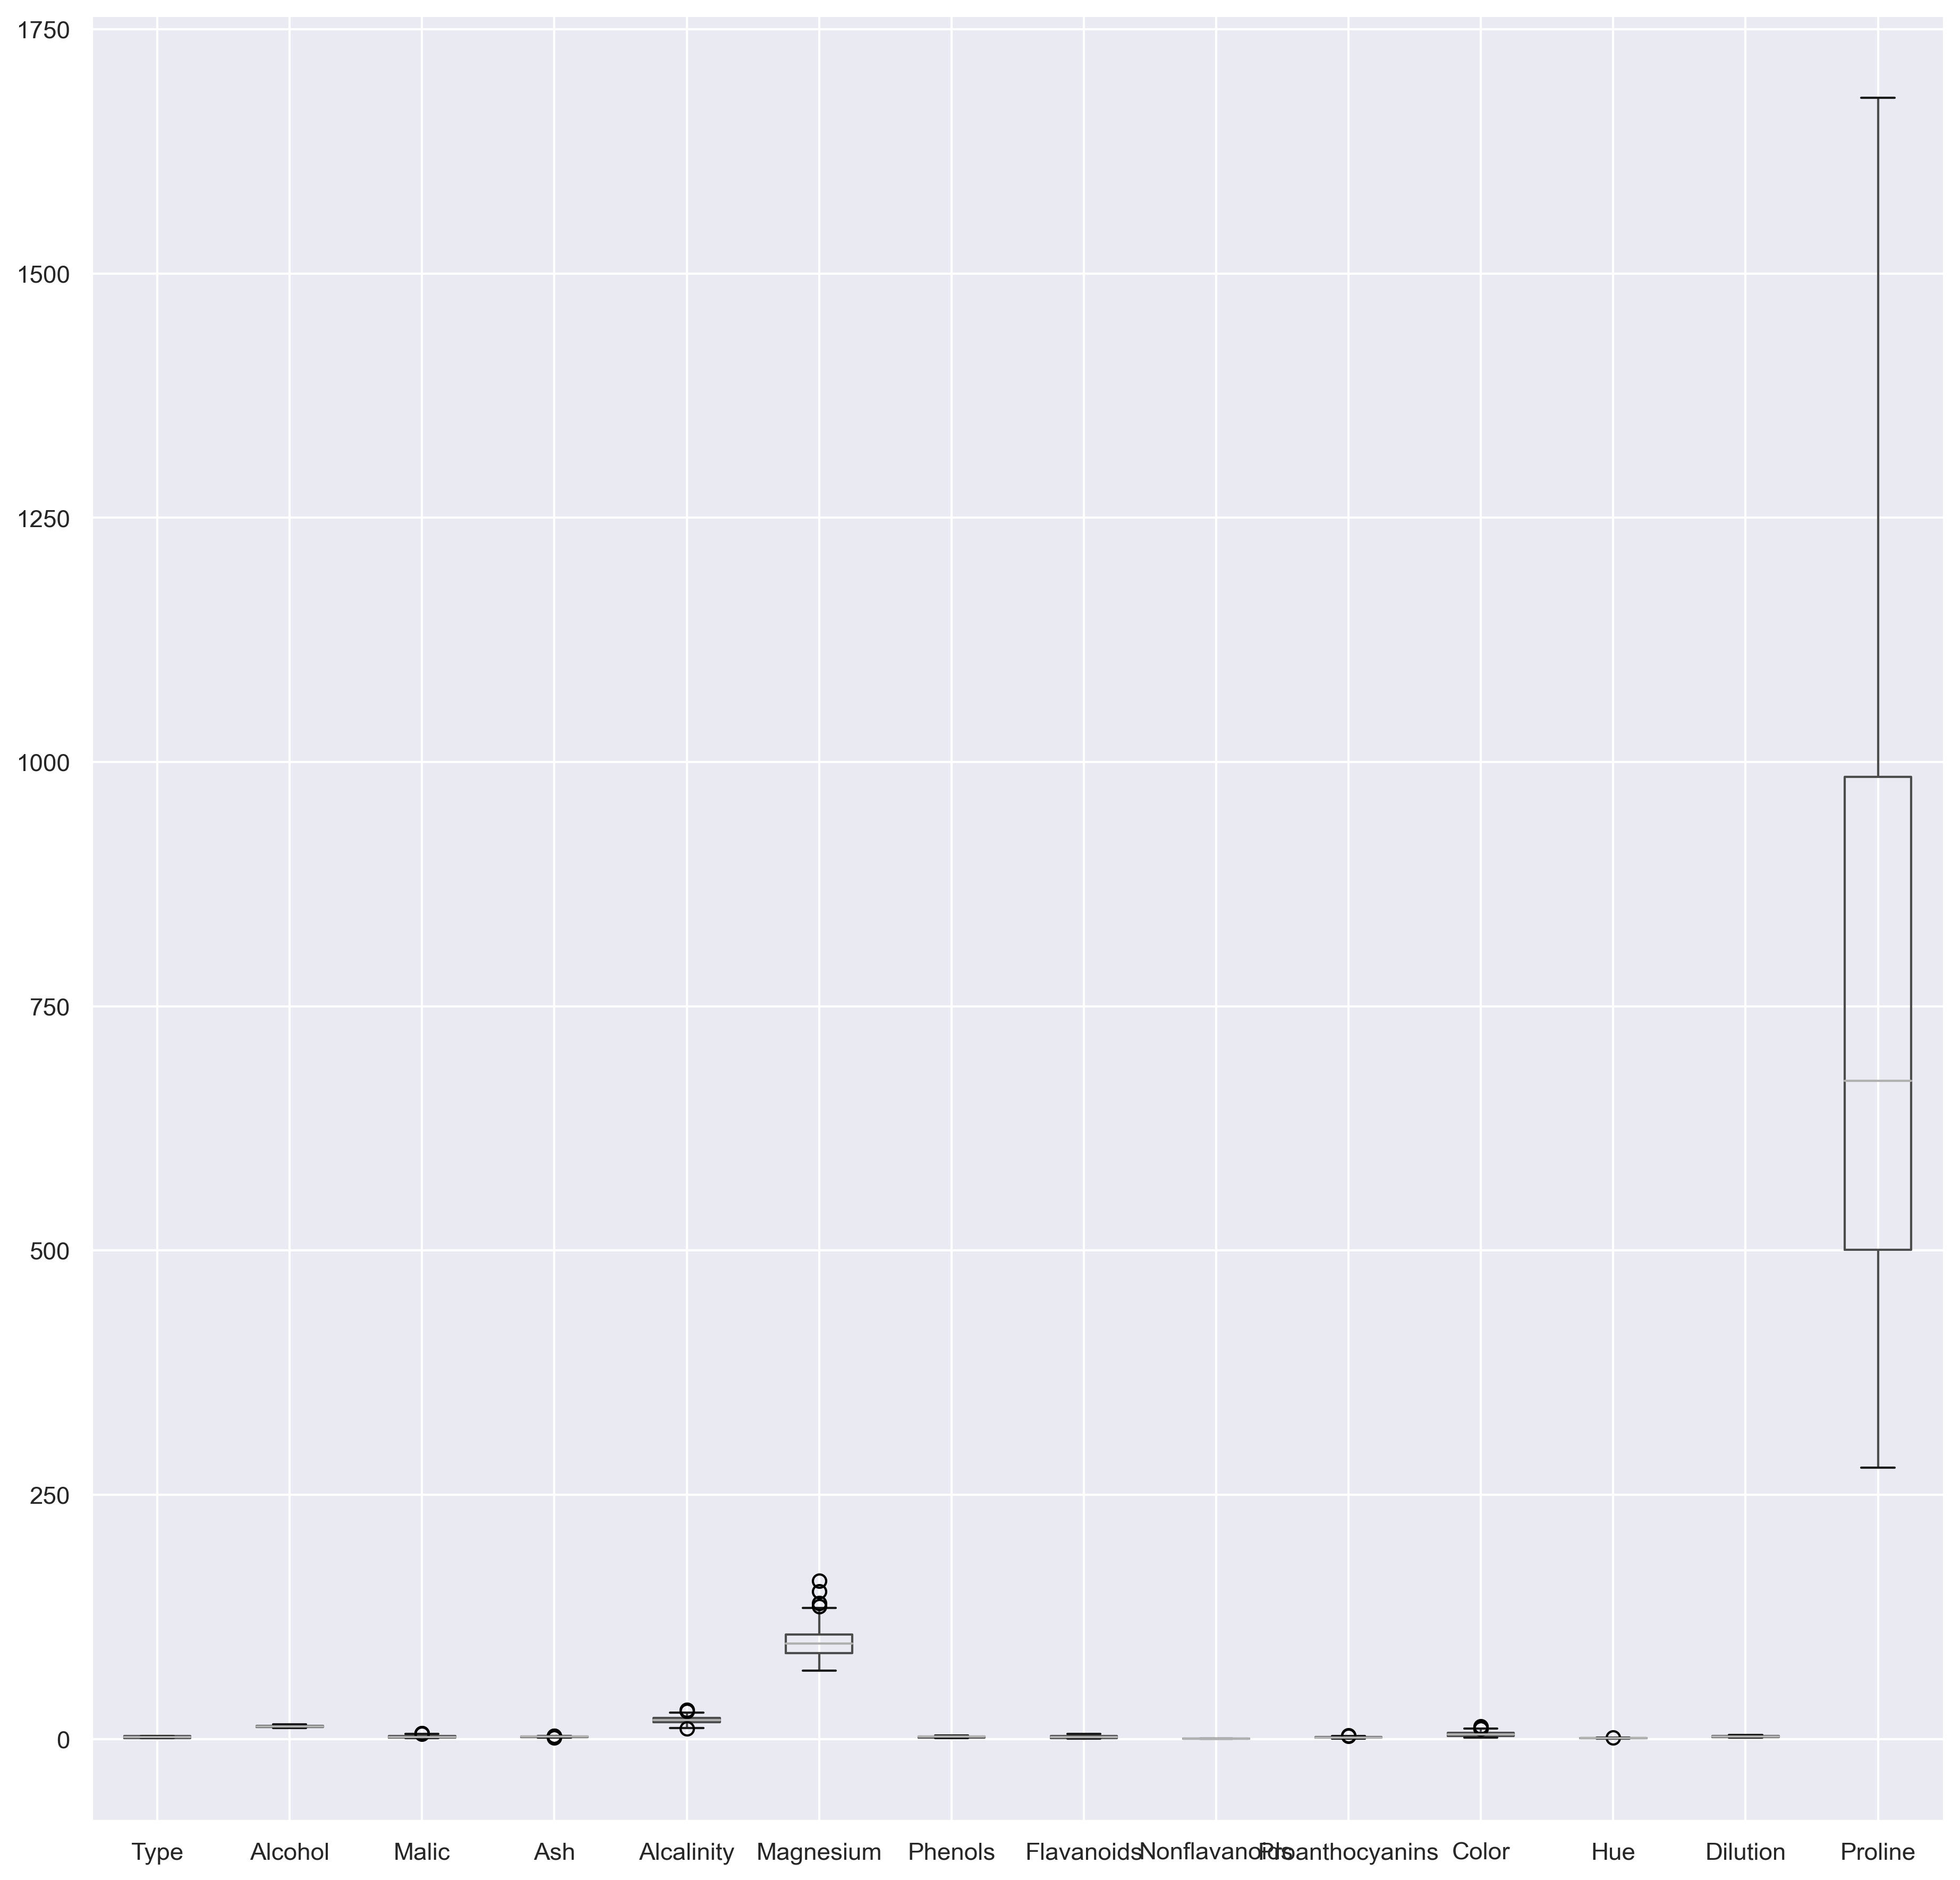

In [8]:
#boxplot
df.boxplot()

In [9]:
#handling outlier

In [10]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [11]:
outlier_detection(df,df.columns)

<AxesSubplot:>

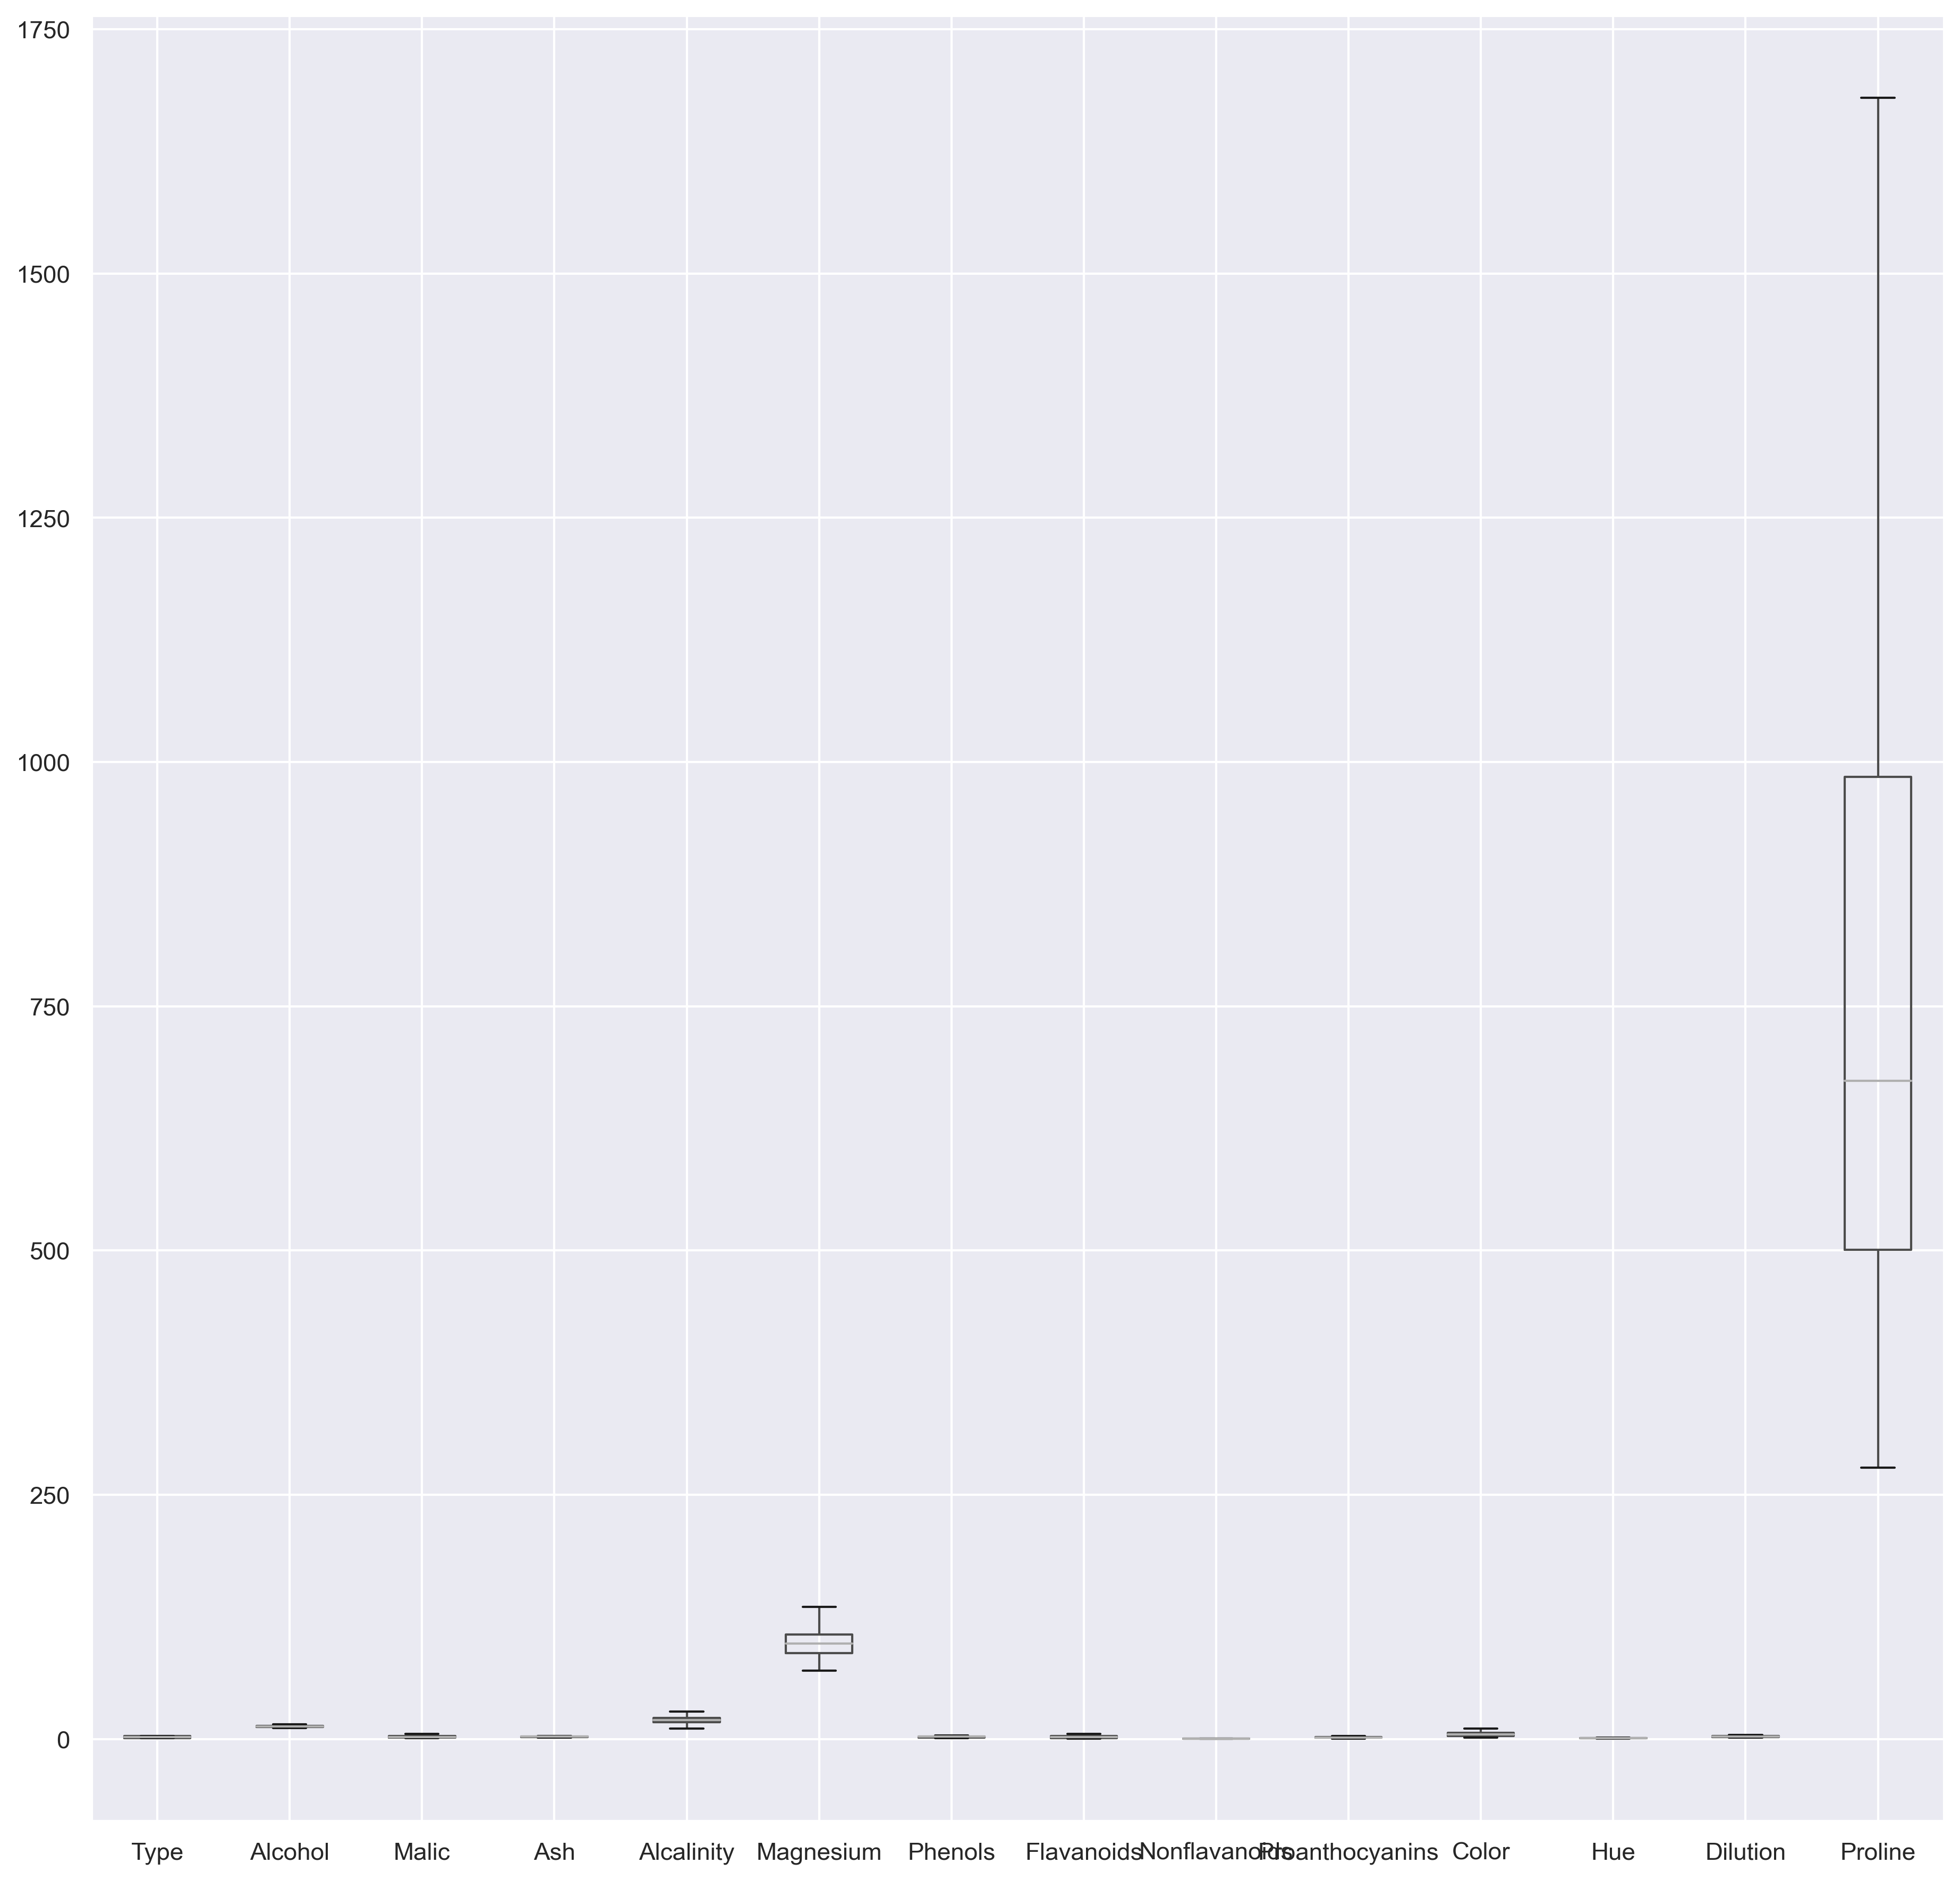

In [12]:
df.boxplot()

<AxesSubplot:ylabel='Density'>

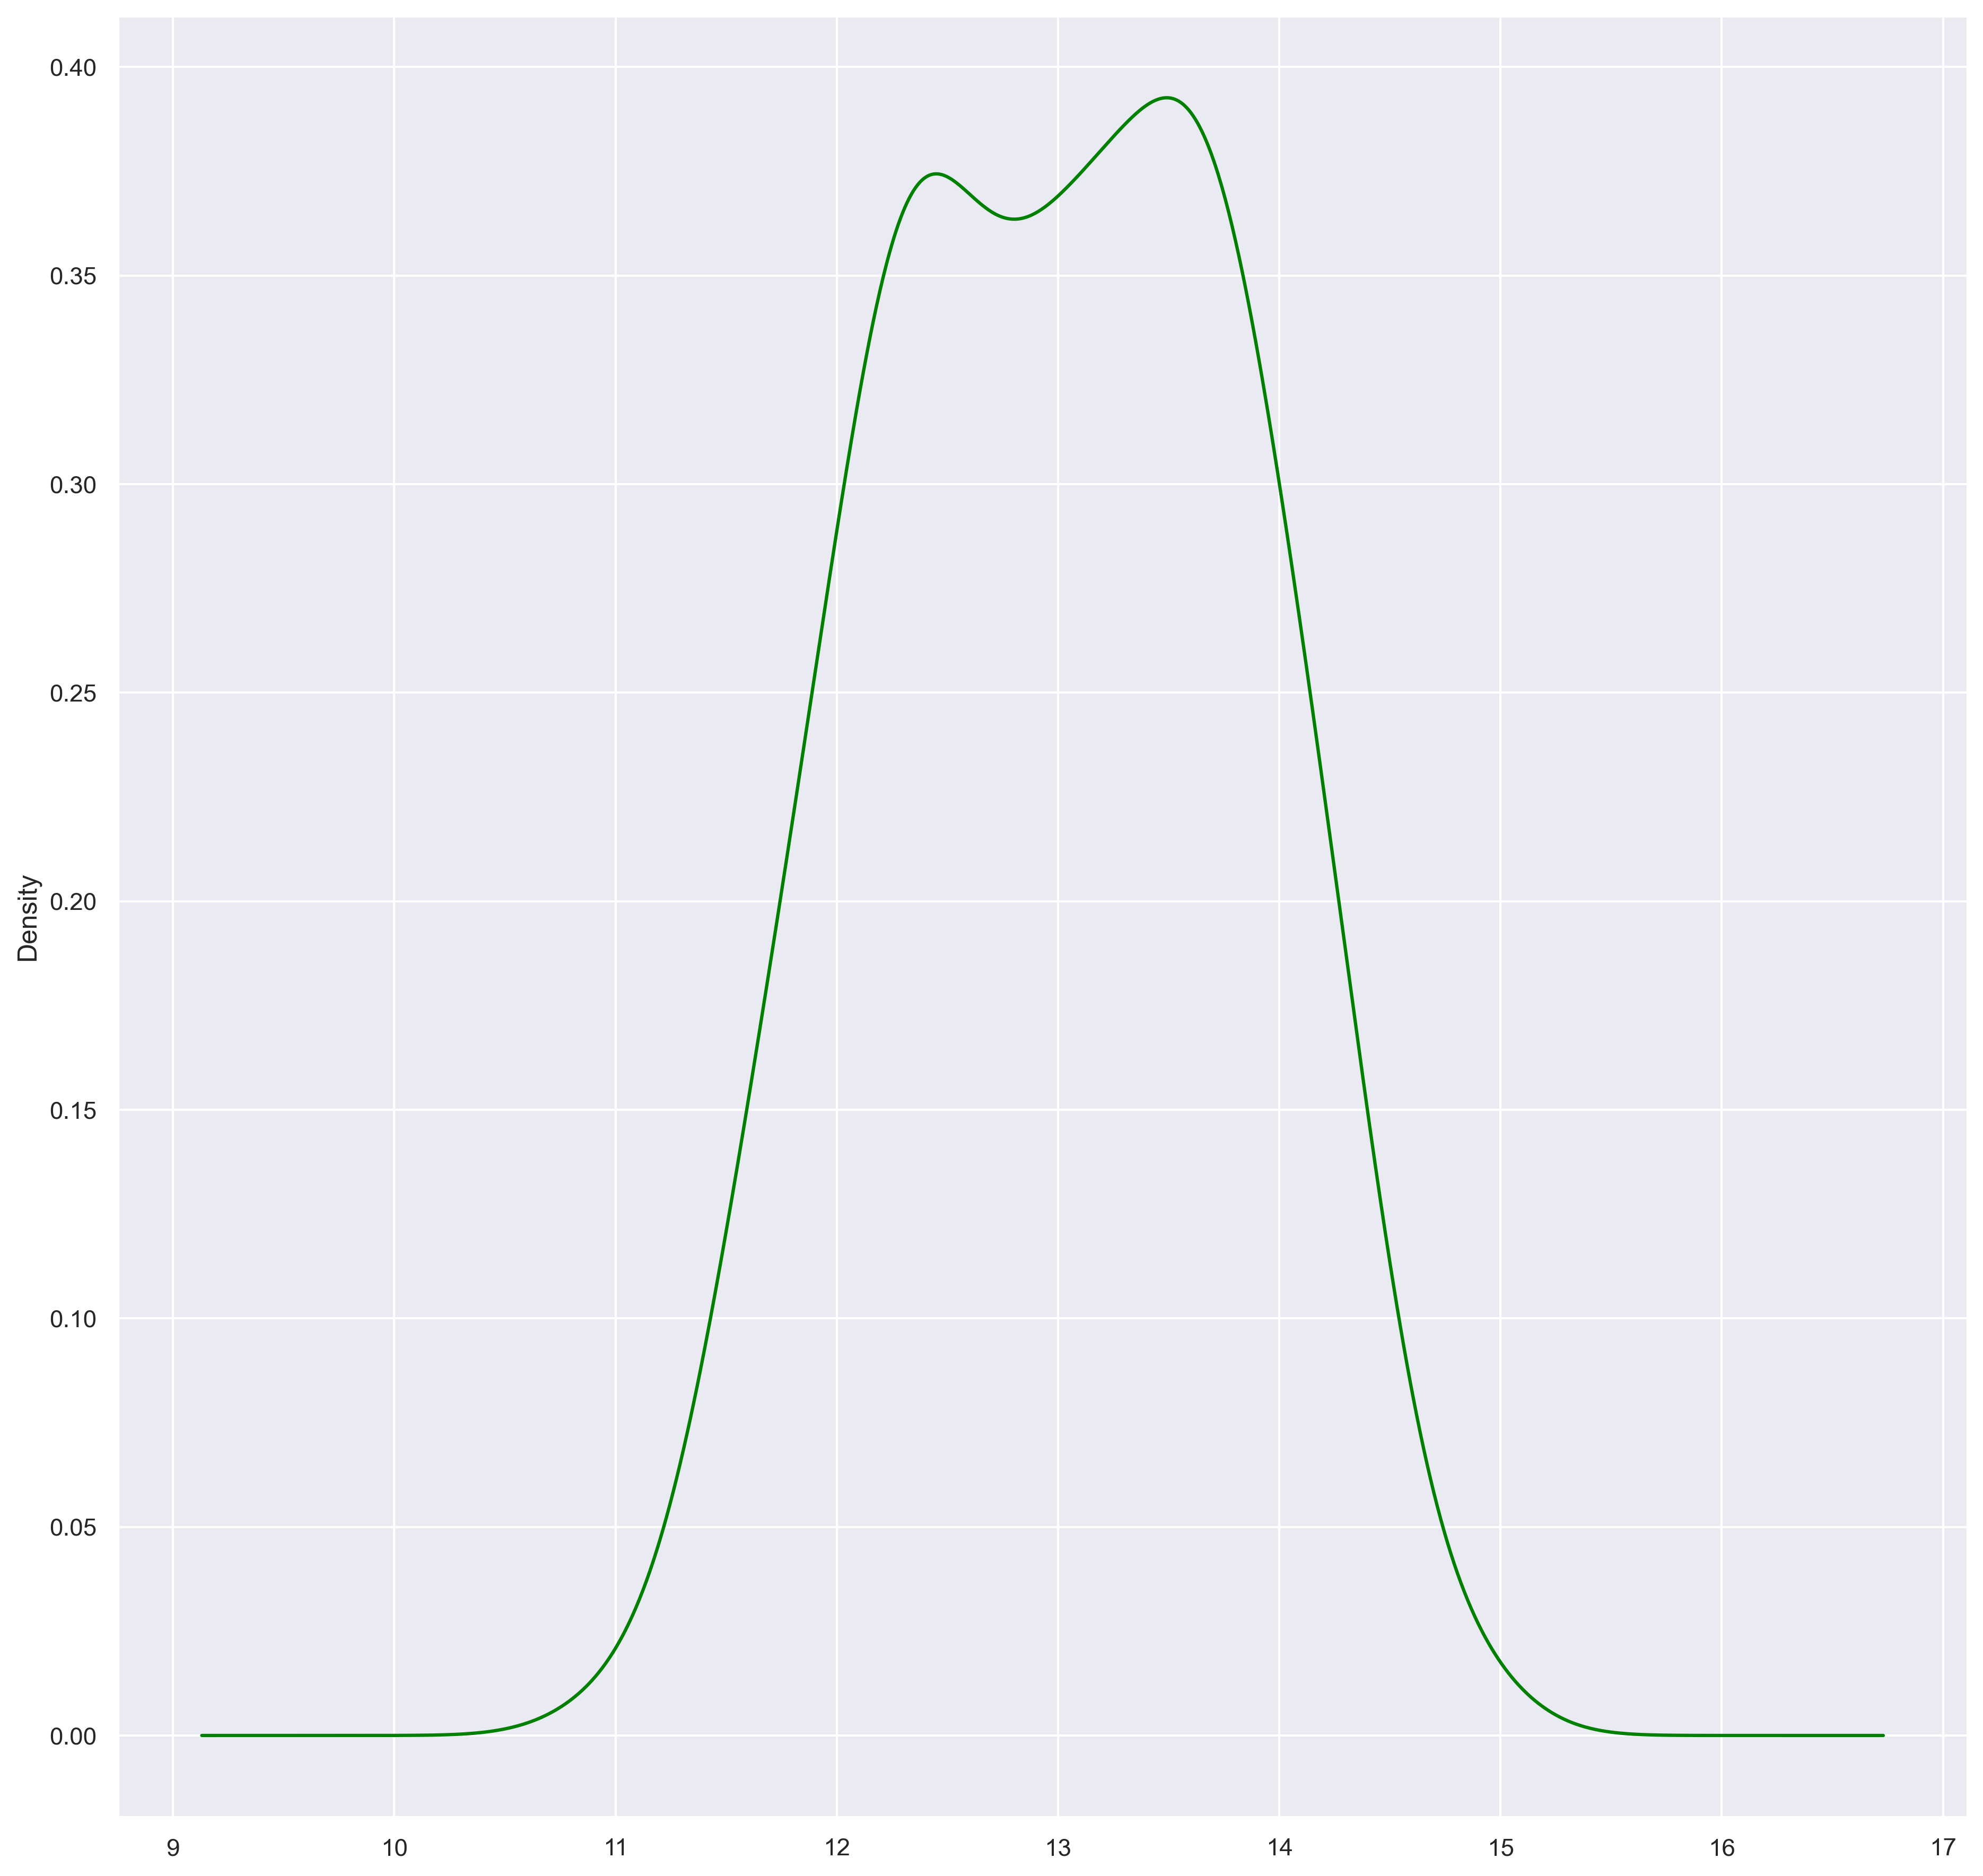

In [13]:
df.Alcohol.plot.density(color='green')

# correlation 

In [14]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


<AxesSubplot:>

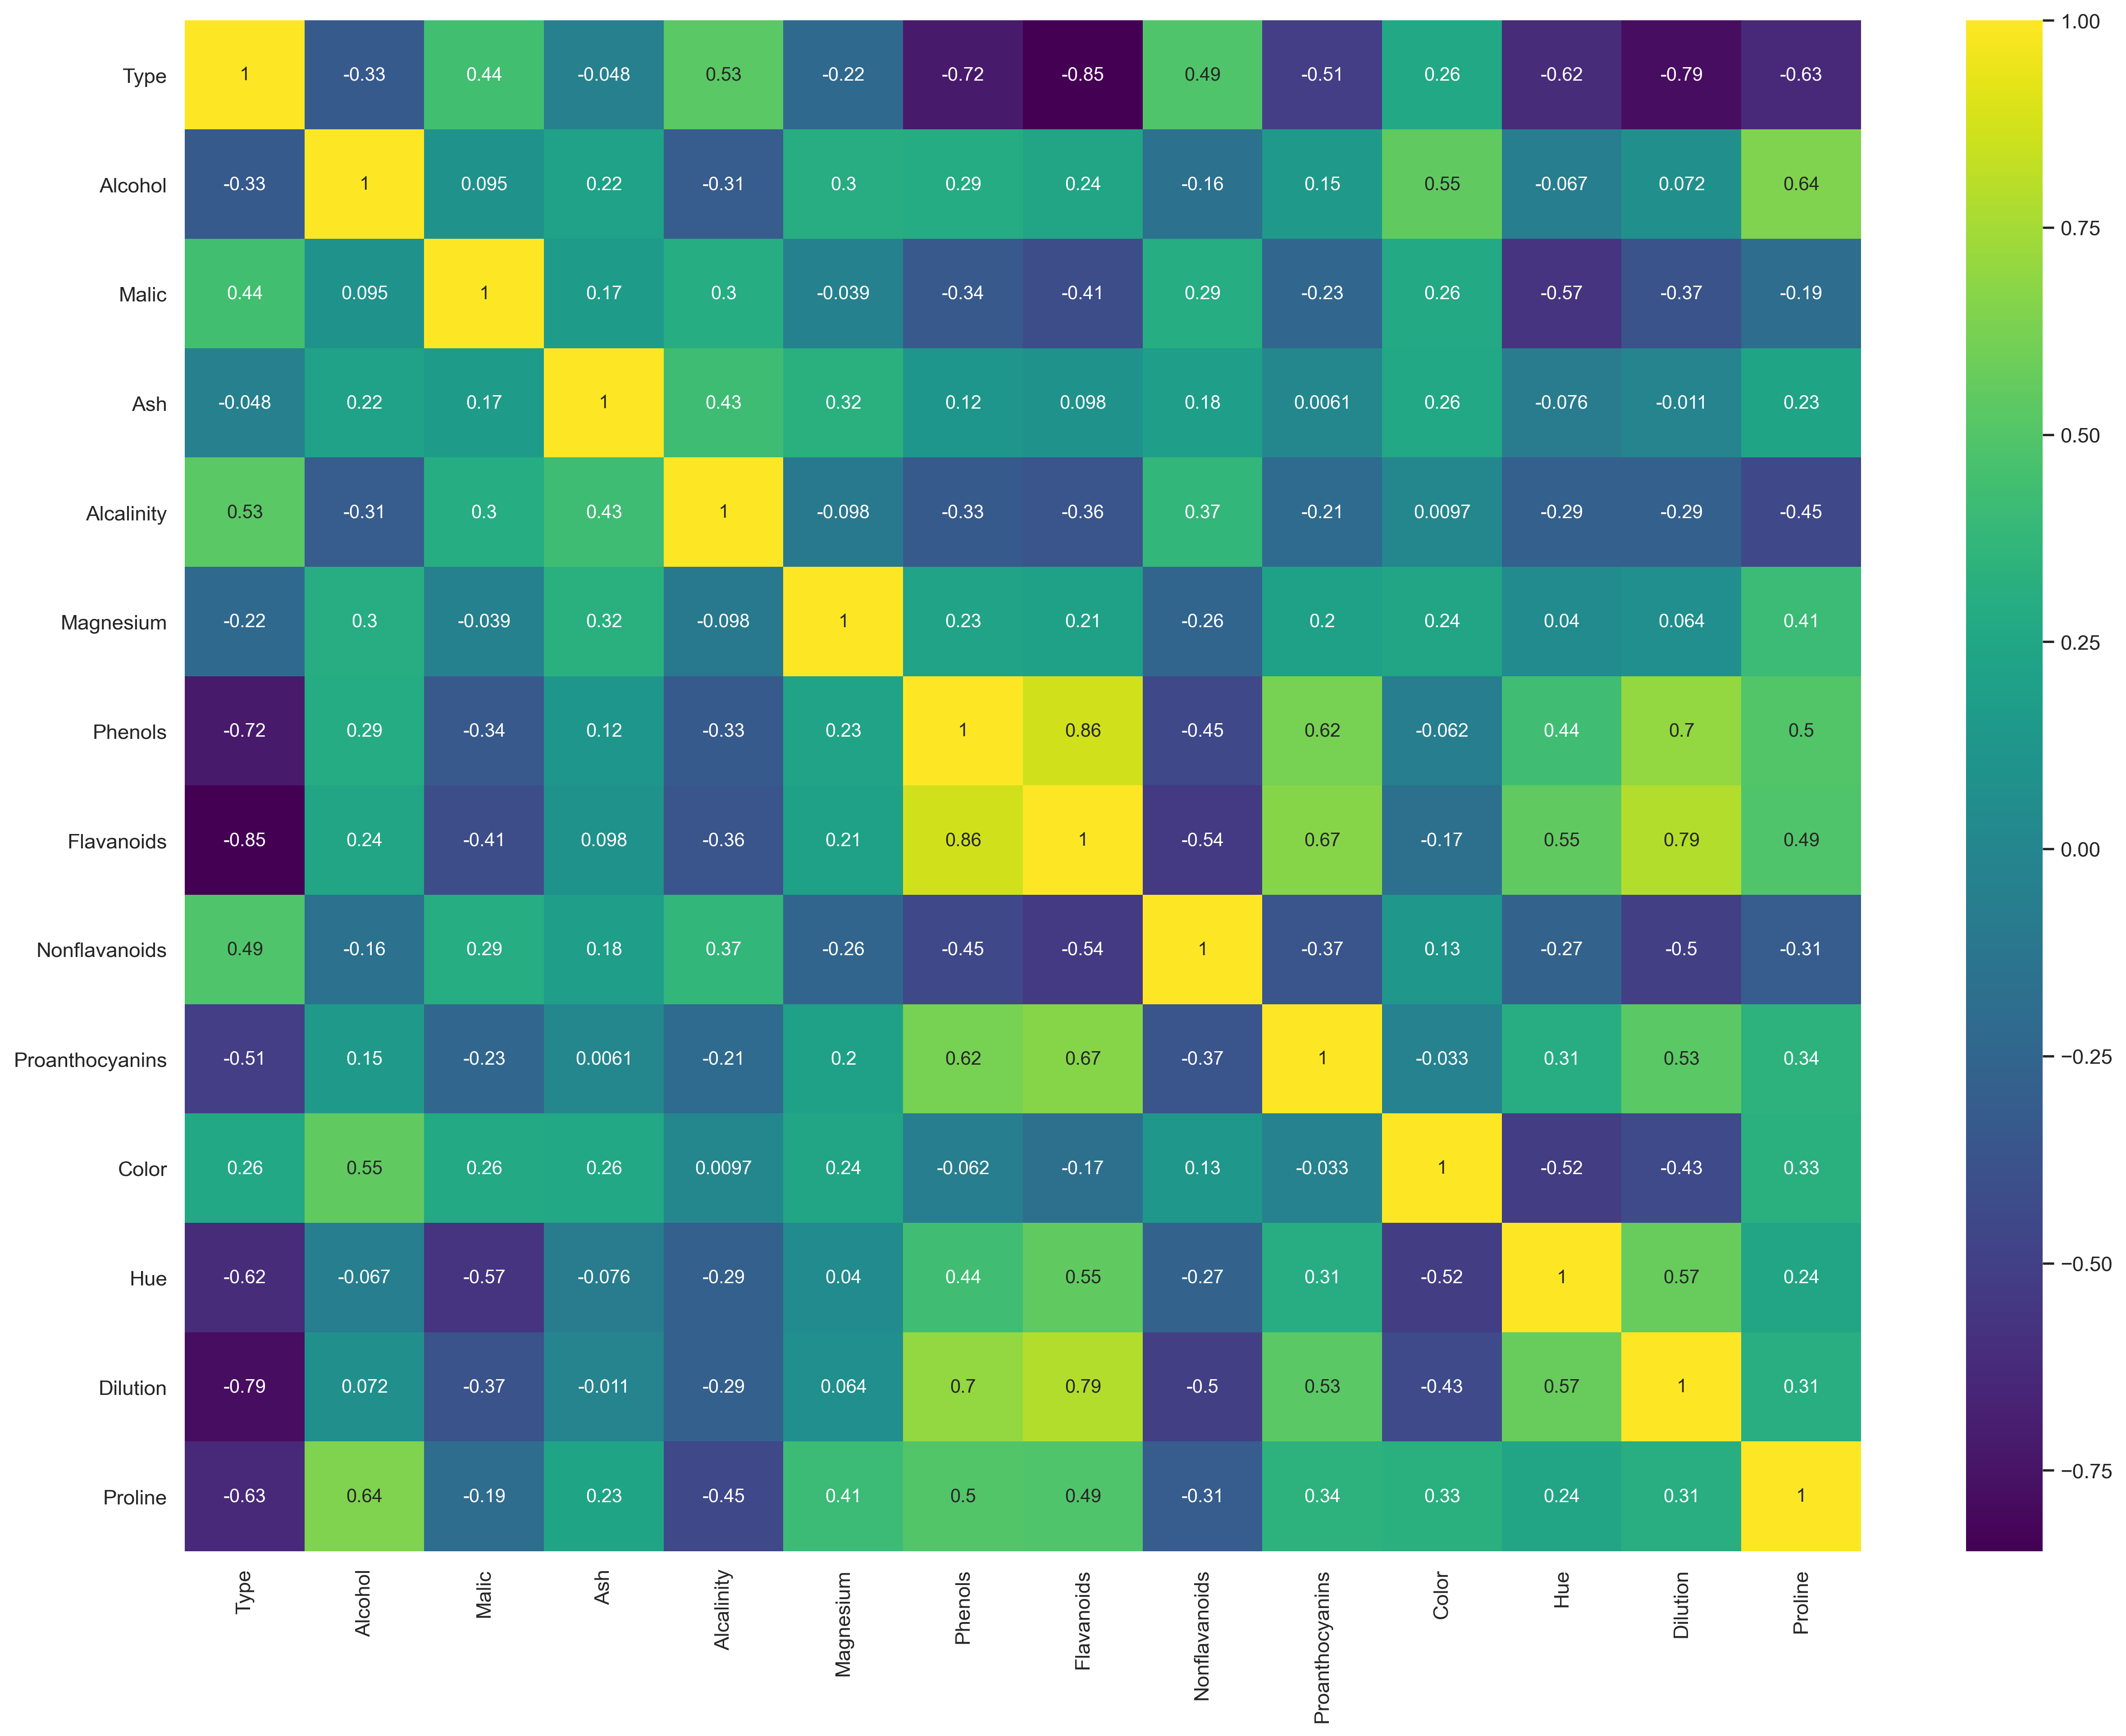

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap= 'viridis')

## Task 2: Dimensionality Reduction with PCA:

Text(0, 0.5, 'Flavanoids')

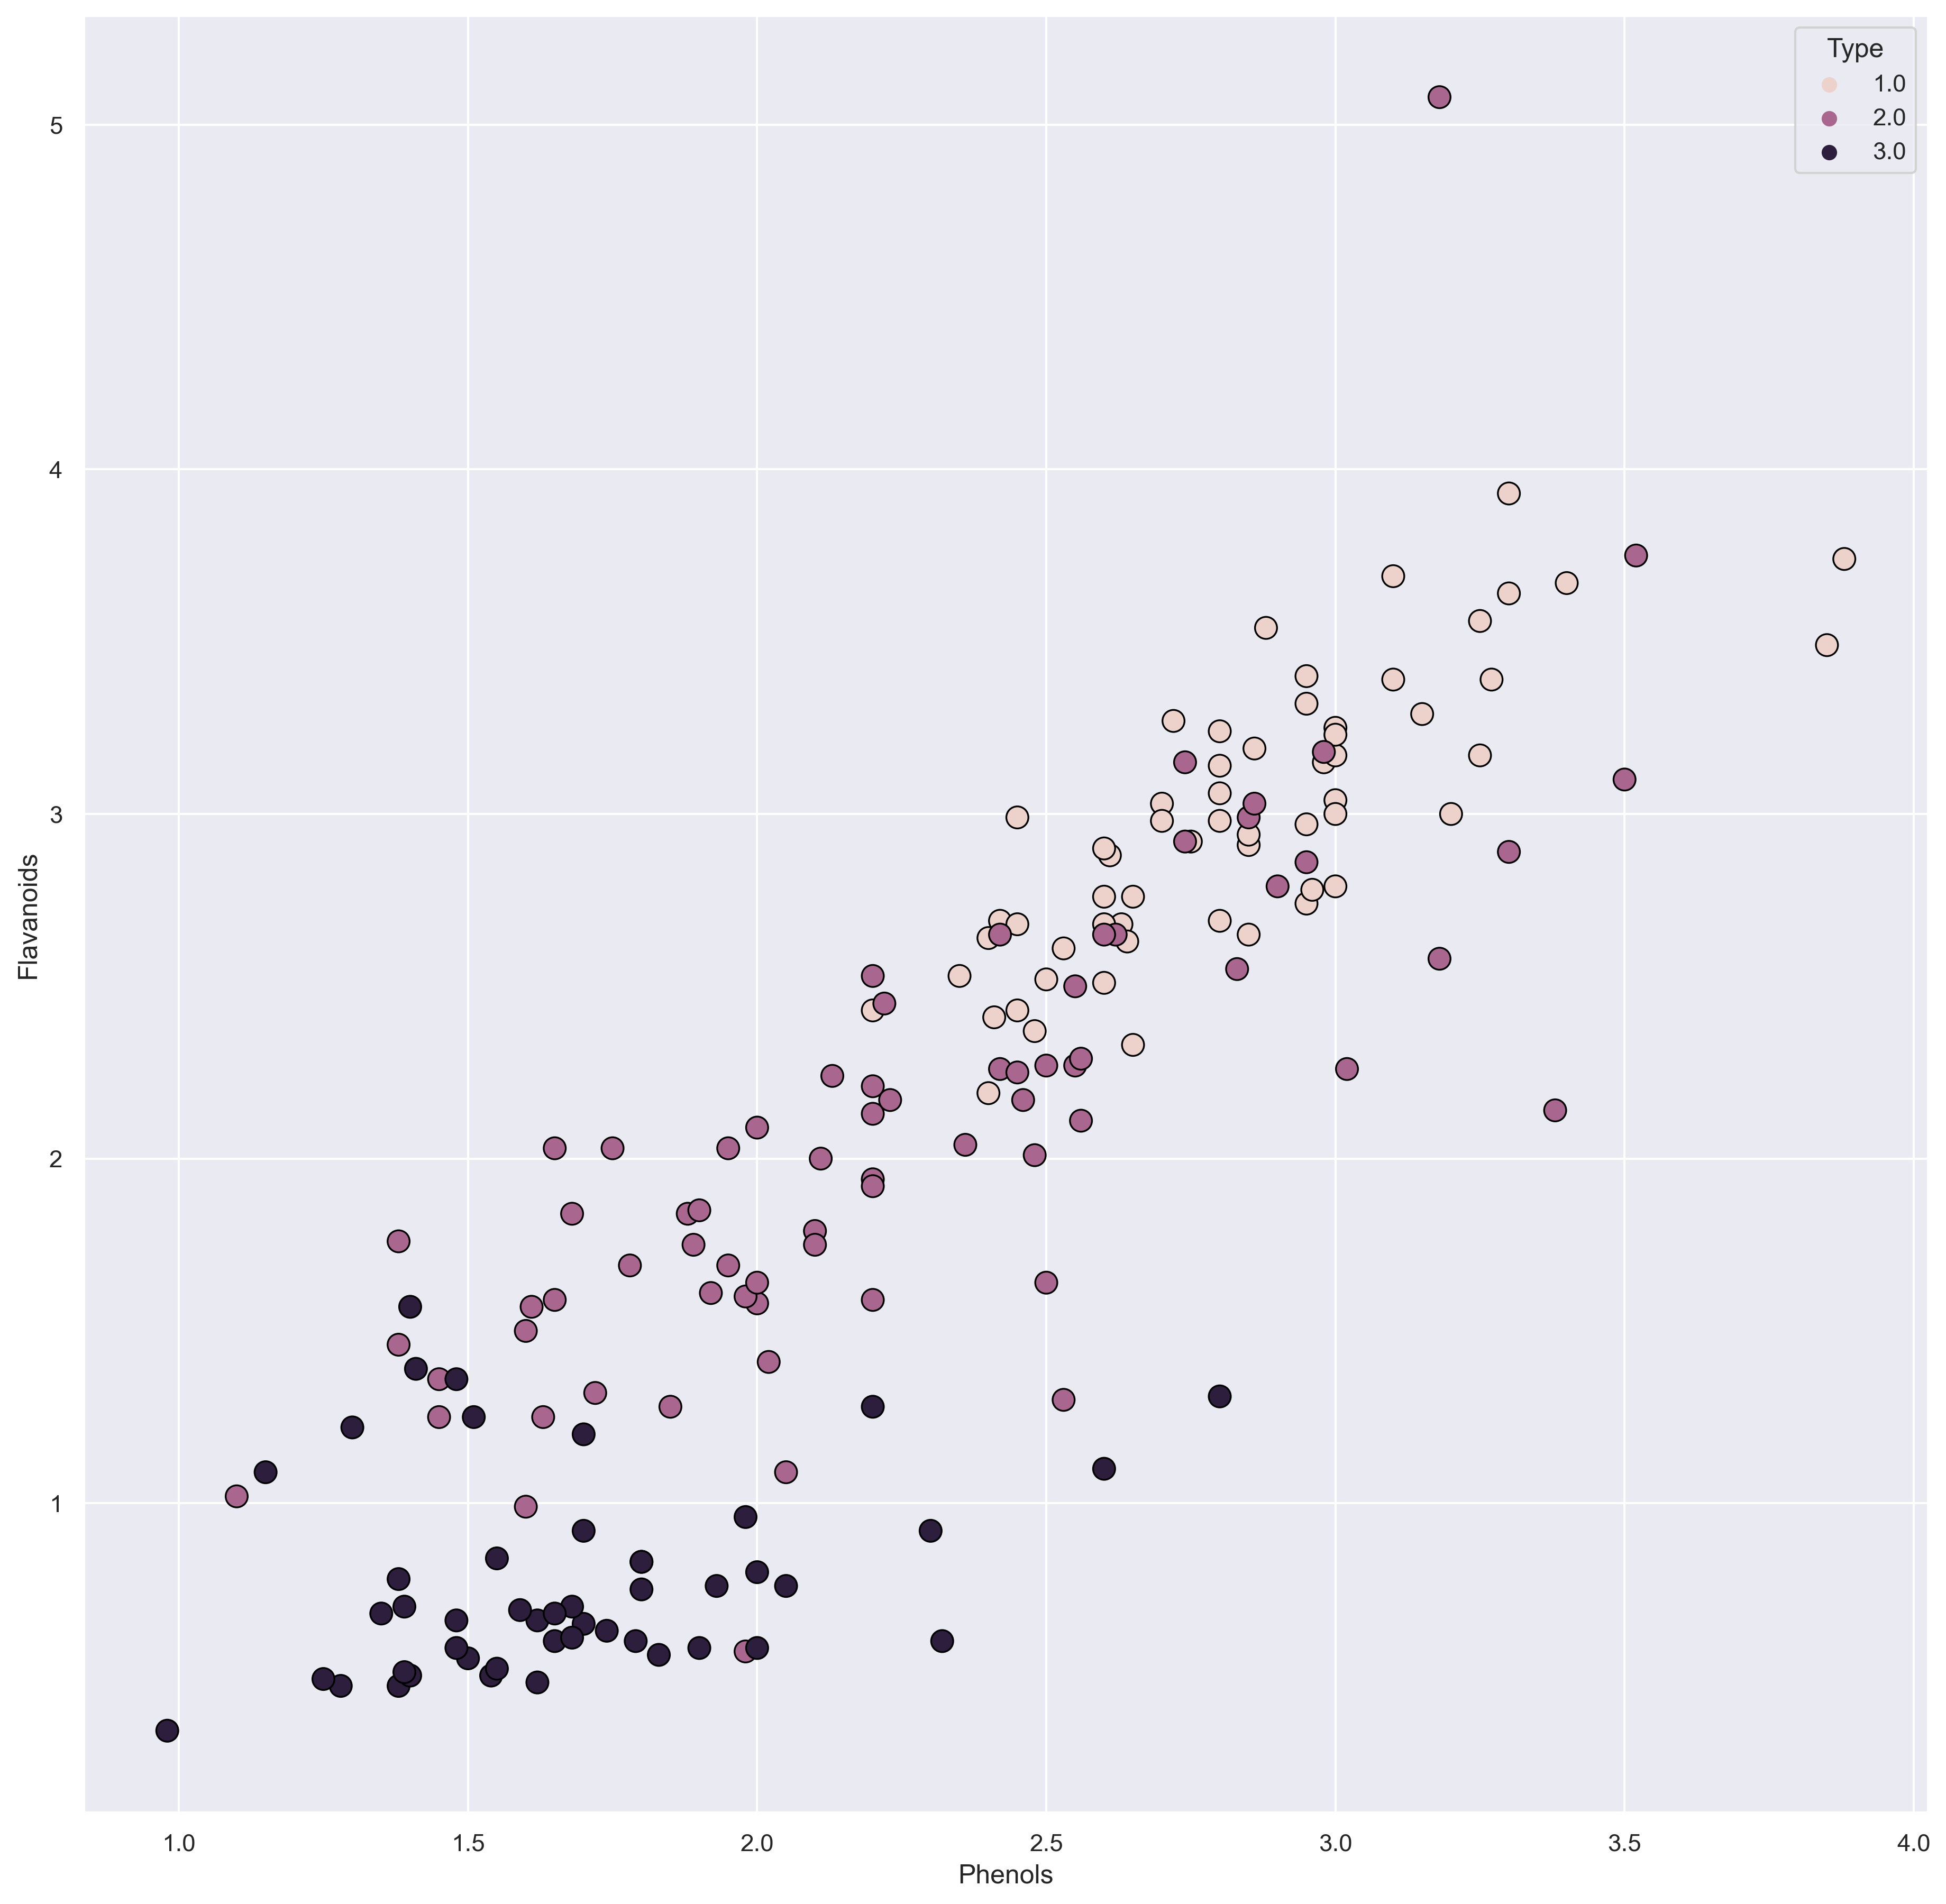

In [16]:
sns.scatterplot(x = df['Phenols'], y = df['Flavanoids'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')

Text(0, 0.5, 'Flavanoids')

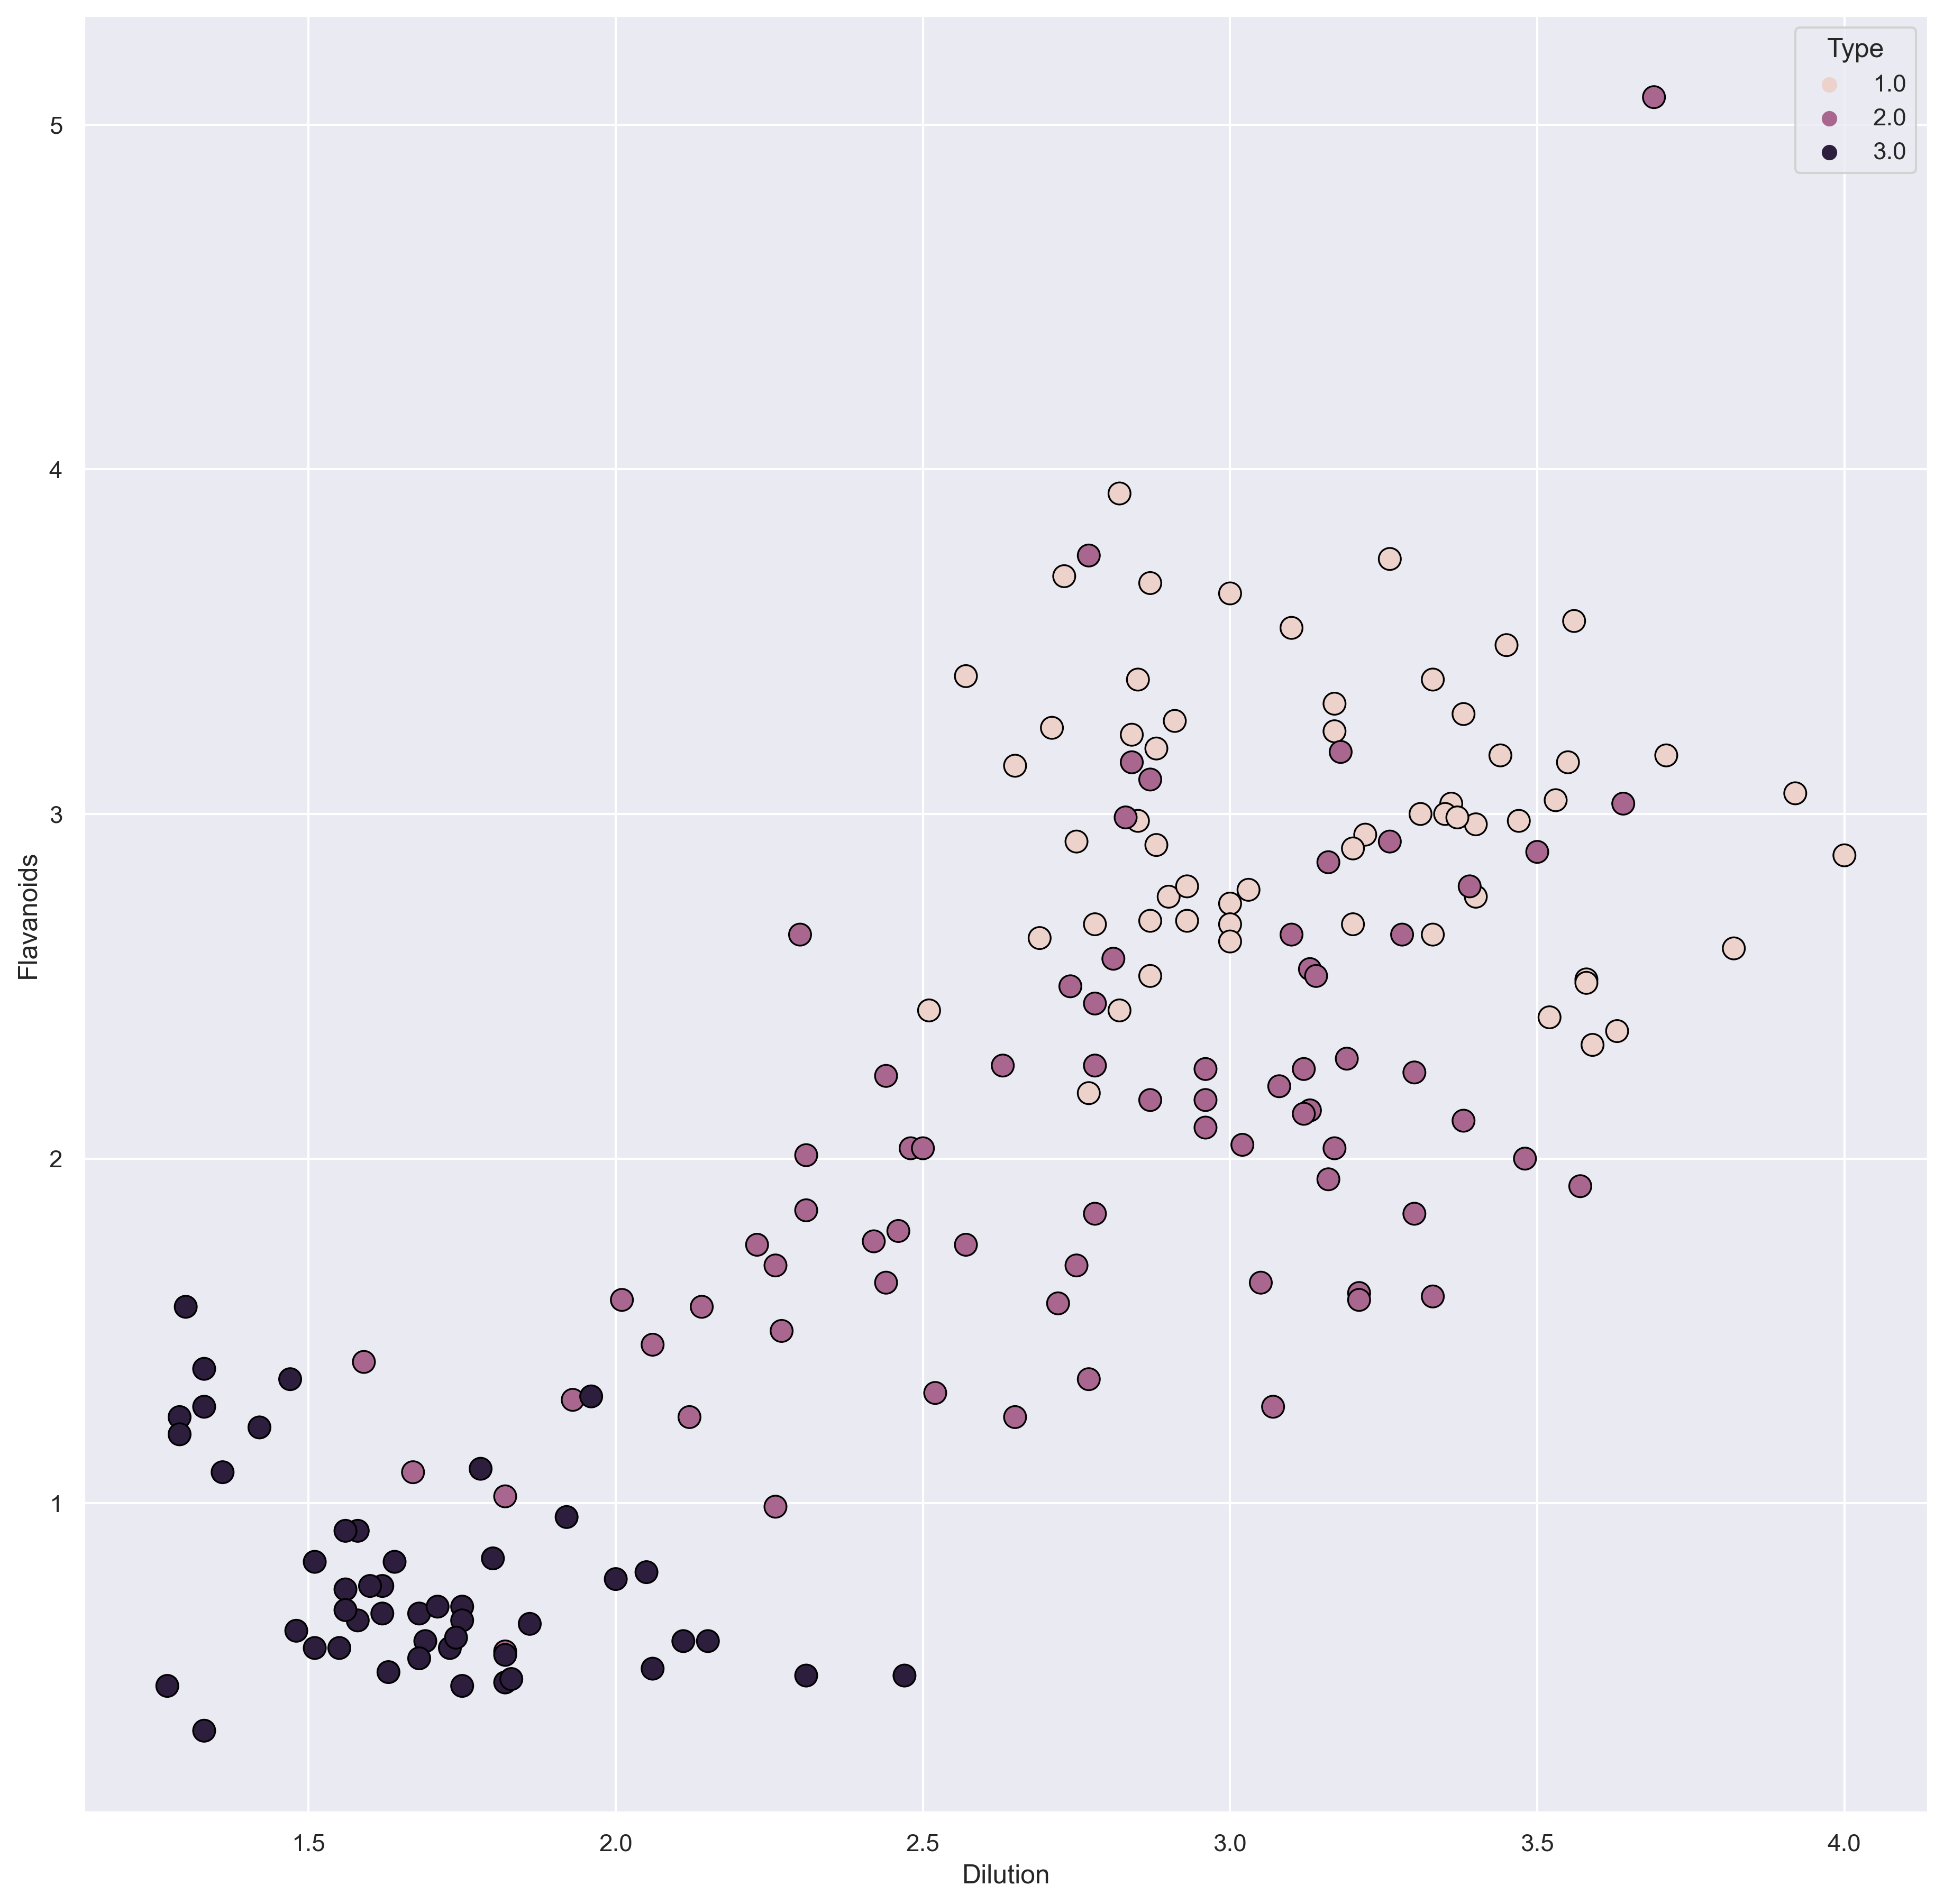

In [17]:
sns.scatterplot(x = df['Dilution'], y = df['Flavanoids'], hue=df['Type'], s = 100, edgecolor = 'black')
plt.xlabel('Dilution')
plt.ylabel('Flavanoids')

In [18]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3.0,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
df.iloc[:,1:]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [20]:
df['Type']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
173    3.0
174    3.0
175    3.0
176    3.0
177    3.0
Name: Type, Length: 178, dtype: float64

In [21]:
x= df.iloc[:,1:]
y=df['Type']

In [22]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Standardize the features 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc= StandardScaler()

In [25]:
x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

## Implement PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca= PCA()

In [28]:
pcs = pca.fit_transform(x)

In [29]:
pcs

array([[ 3.35814747, -1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481,  0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743, -1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907, -2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346, -2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394, -2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

In [30]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,-0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,-1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,-2.173369,-0.383365,0.925038,-0.633273,-1.060998,0.685717,-0.130305,-0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,-1.797712,0.210332,0.398412,0.192034,0.011534,0.136131,-0.565178,-0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,-2.865301,-0.975126,0.360633,1.185098,0.354148,0.853504,0.013484,0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,-2.393808,-0.561485,-0.643948,0.658651,1.252325,0.813131,0.351025,0.086492,-0.495366,0.353956,0.346681,-0.083471


In [31]:
from scipy.cluster import hierarchy

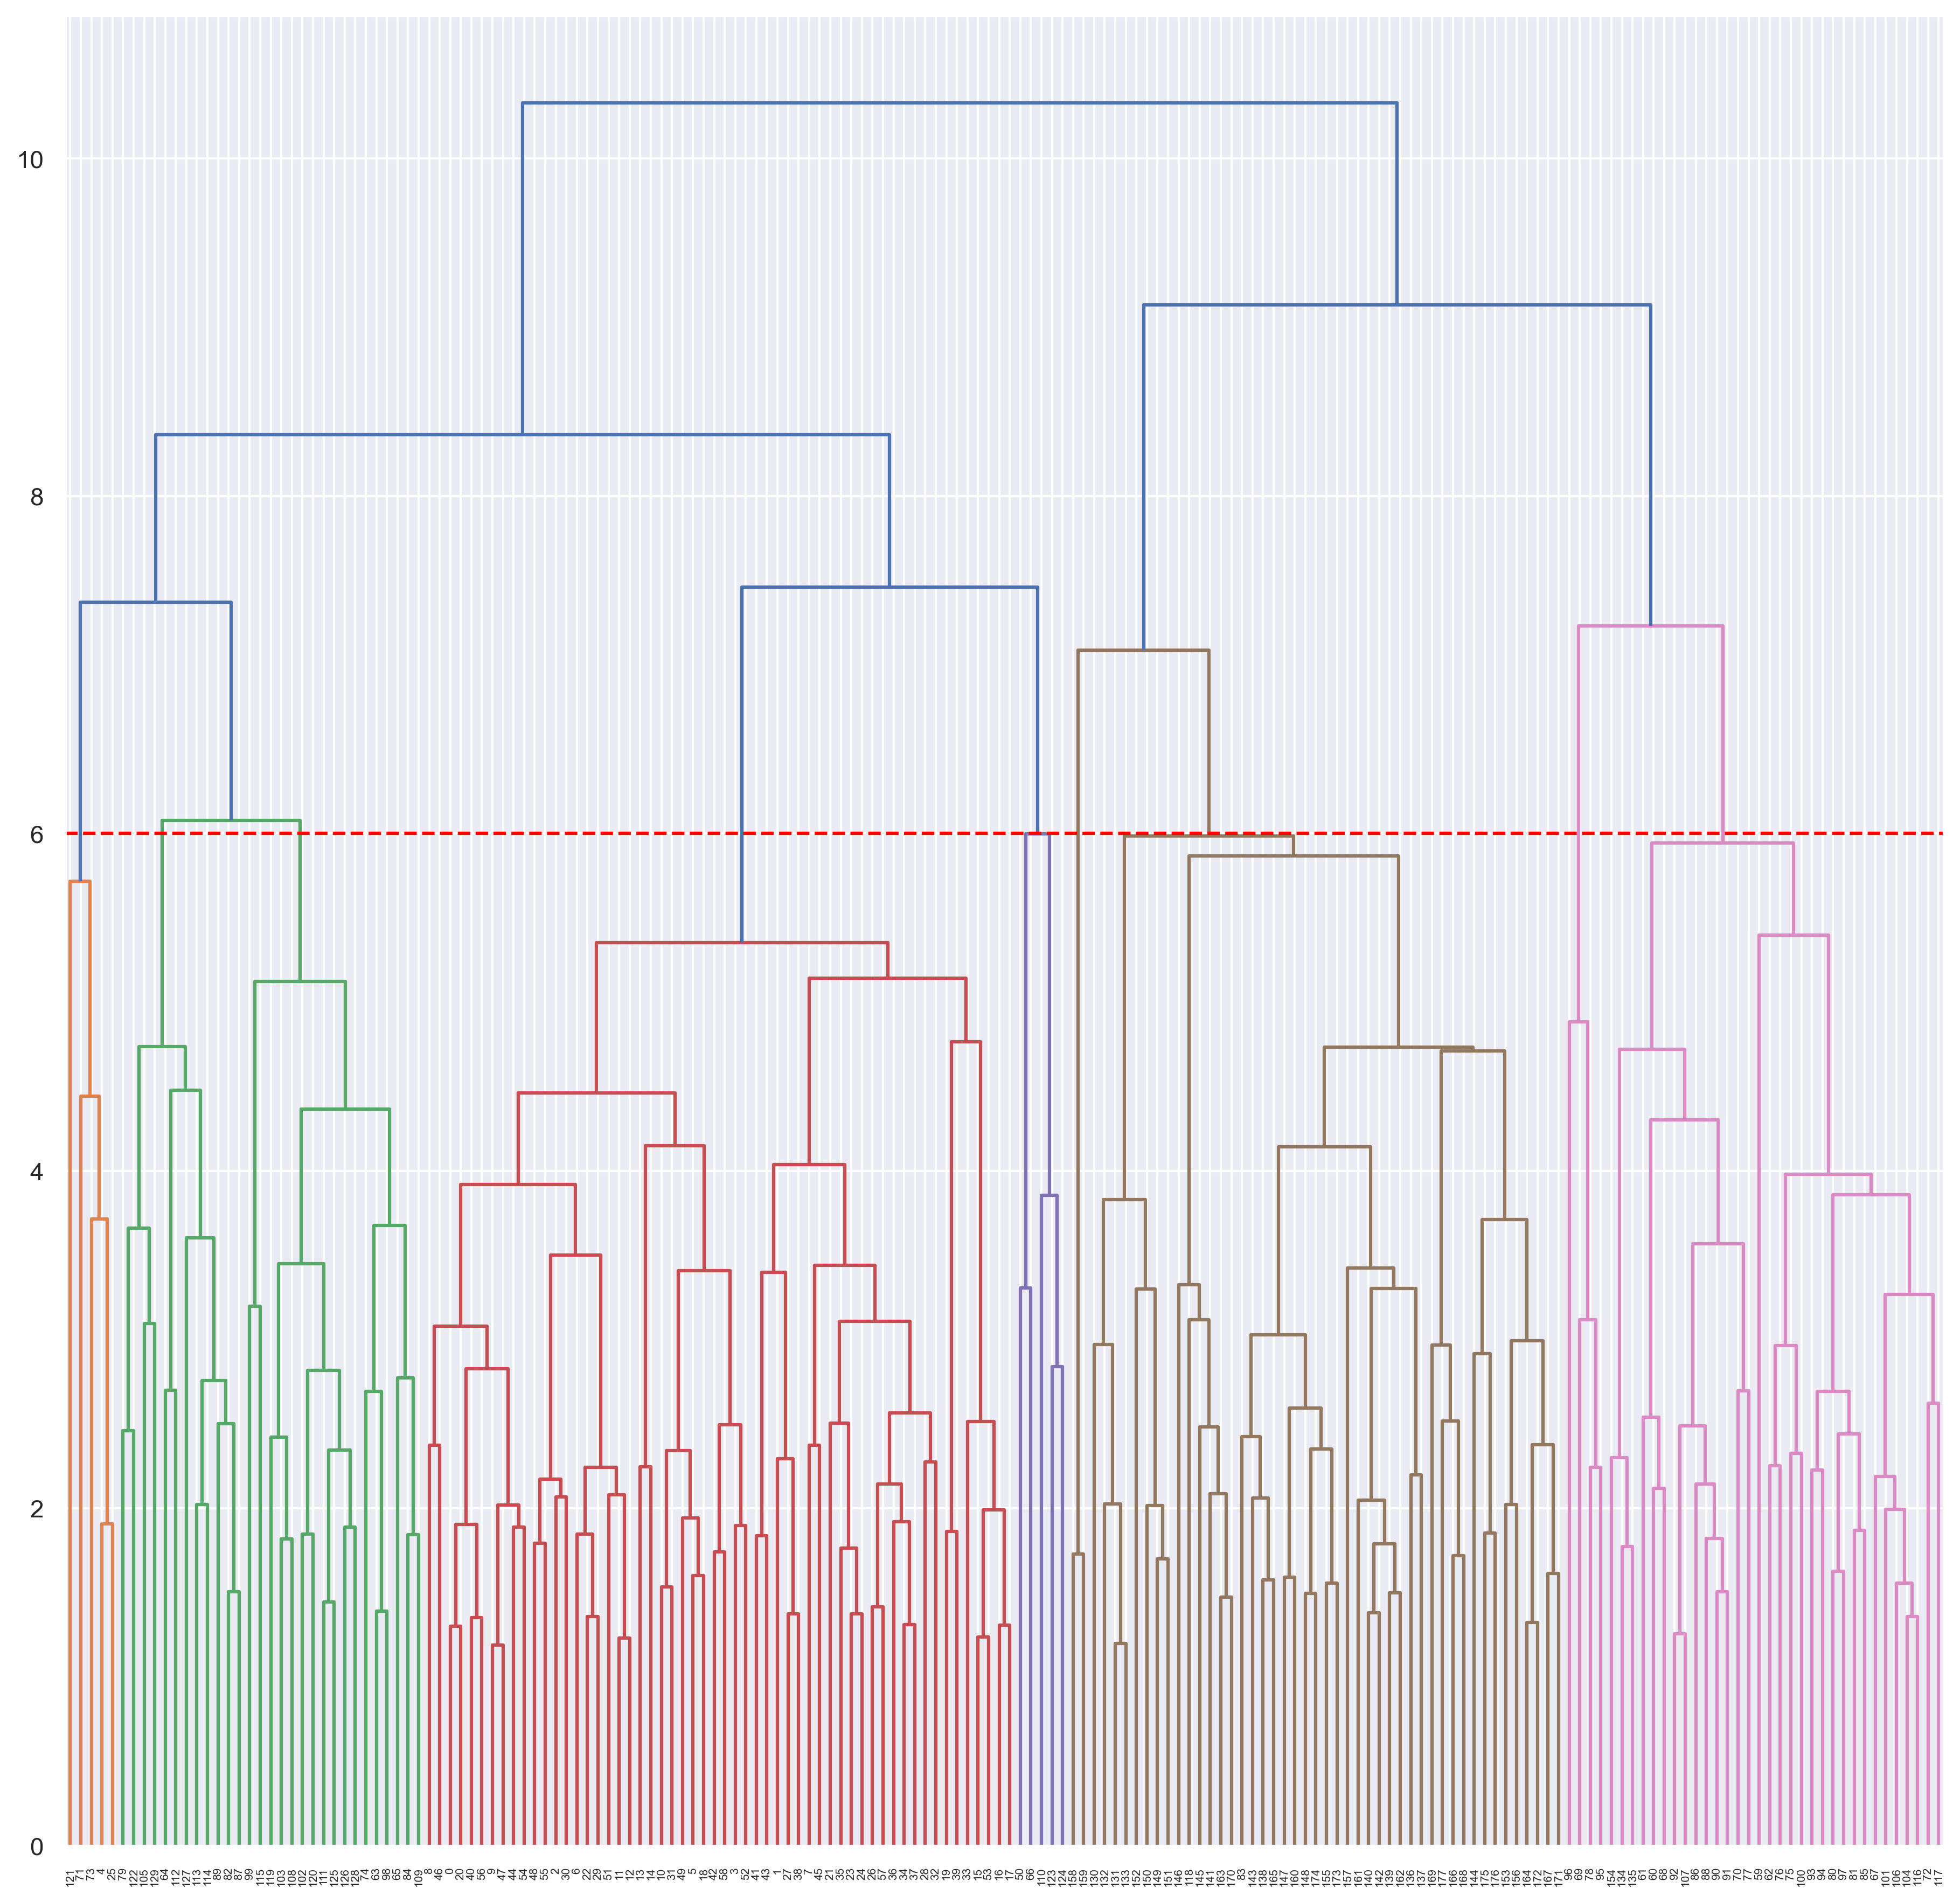

In [32]:
lk = hierarchy.linkage(pcs, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 6, linestyle = '--', color = 'red')

In [33]:
pca.explained_variance_ratio_

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

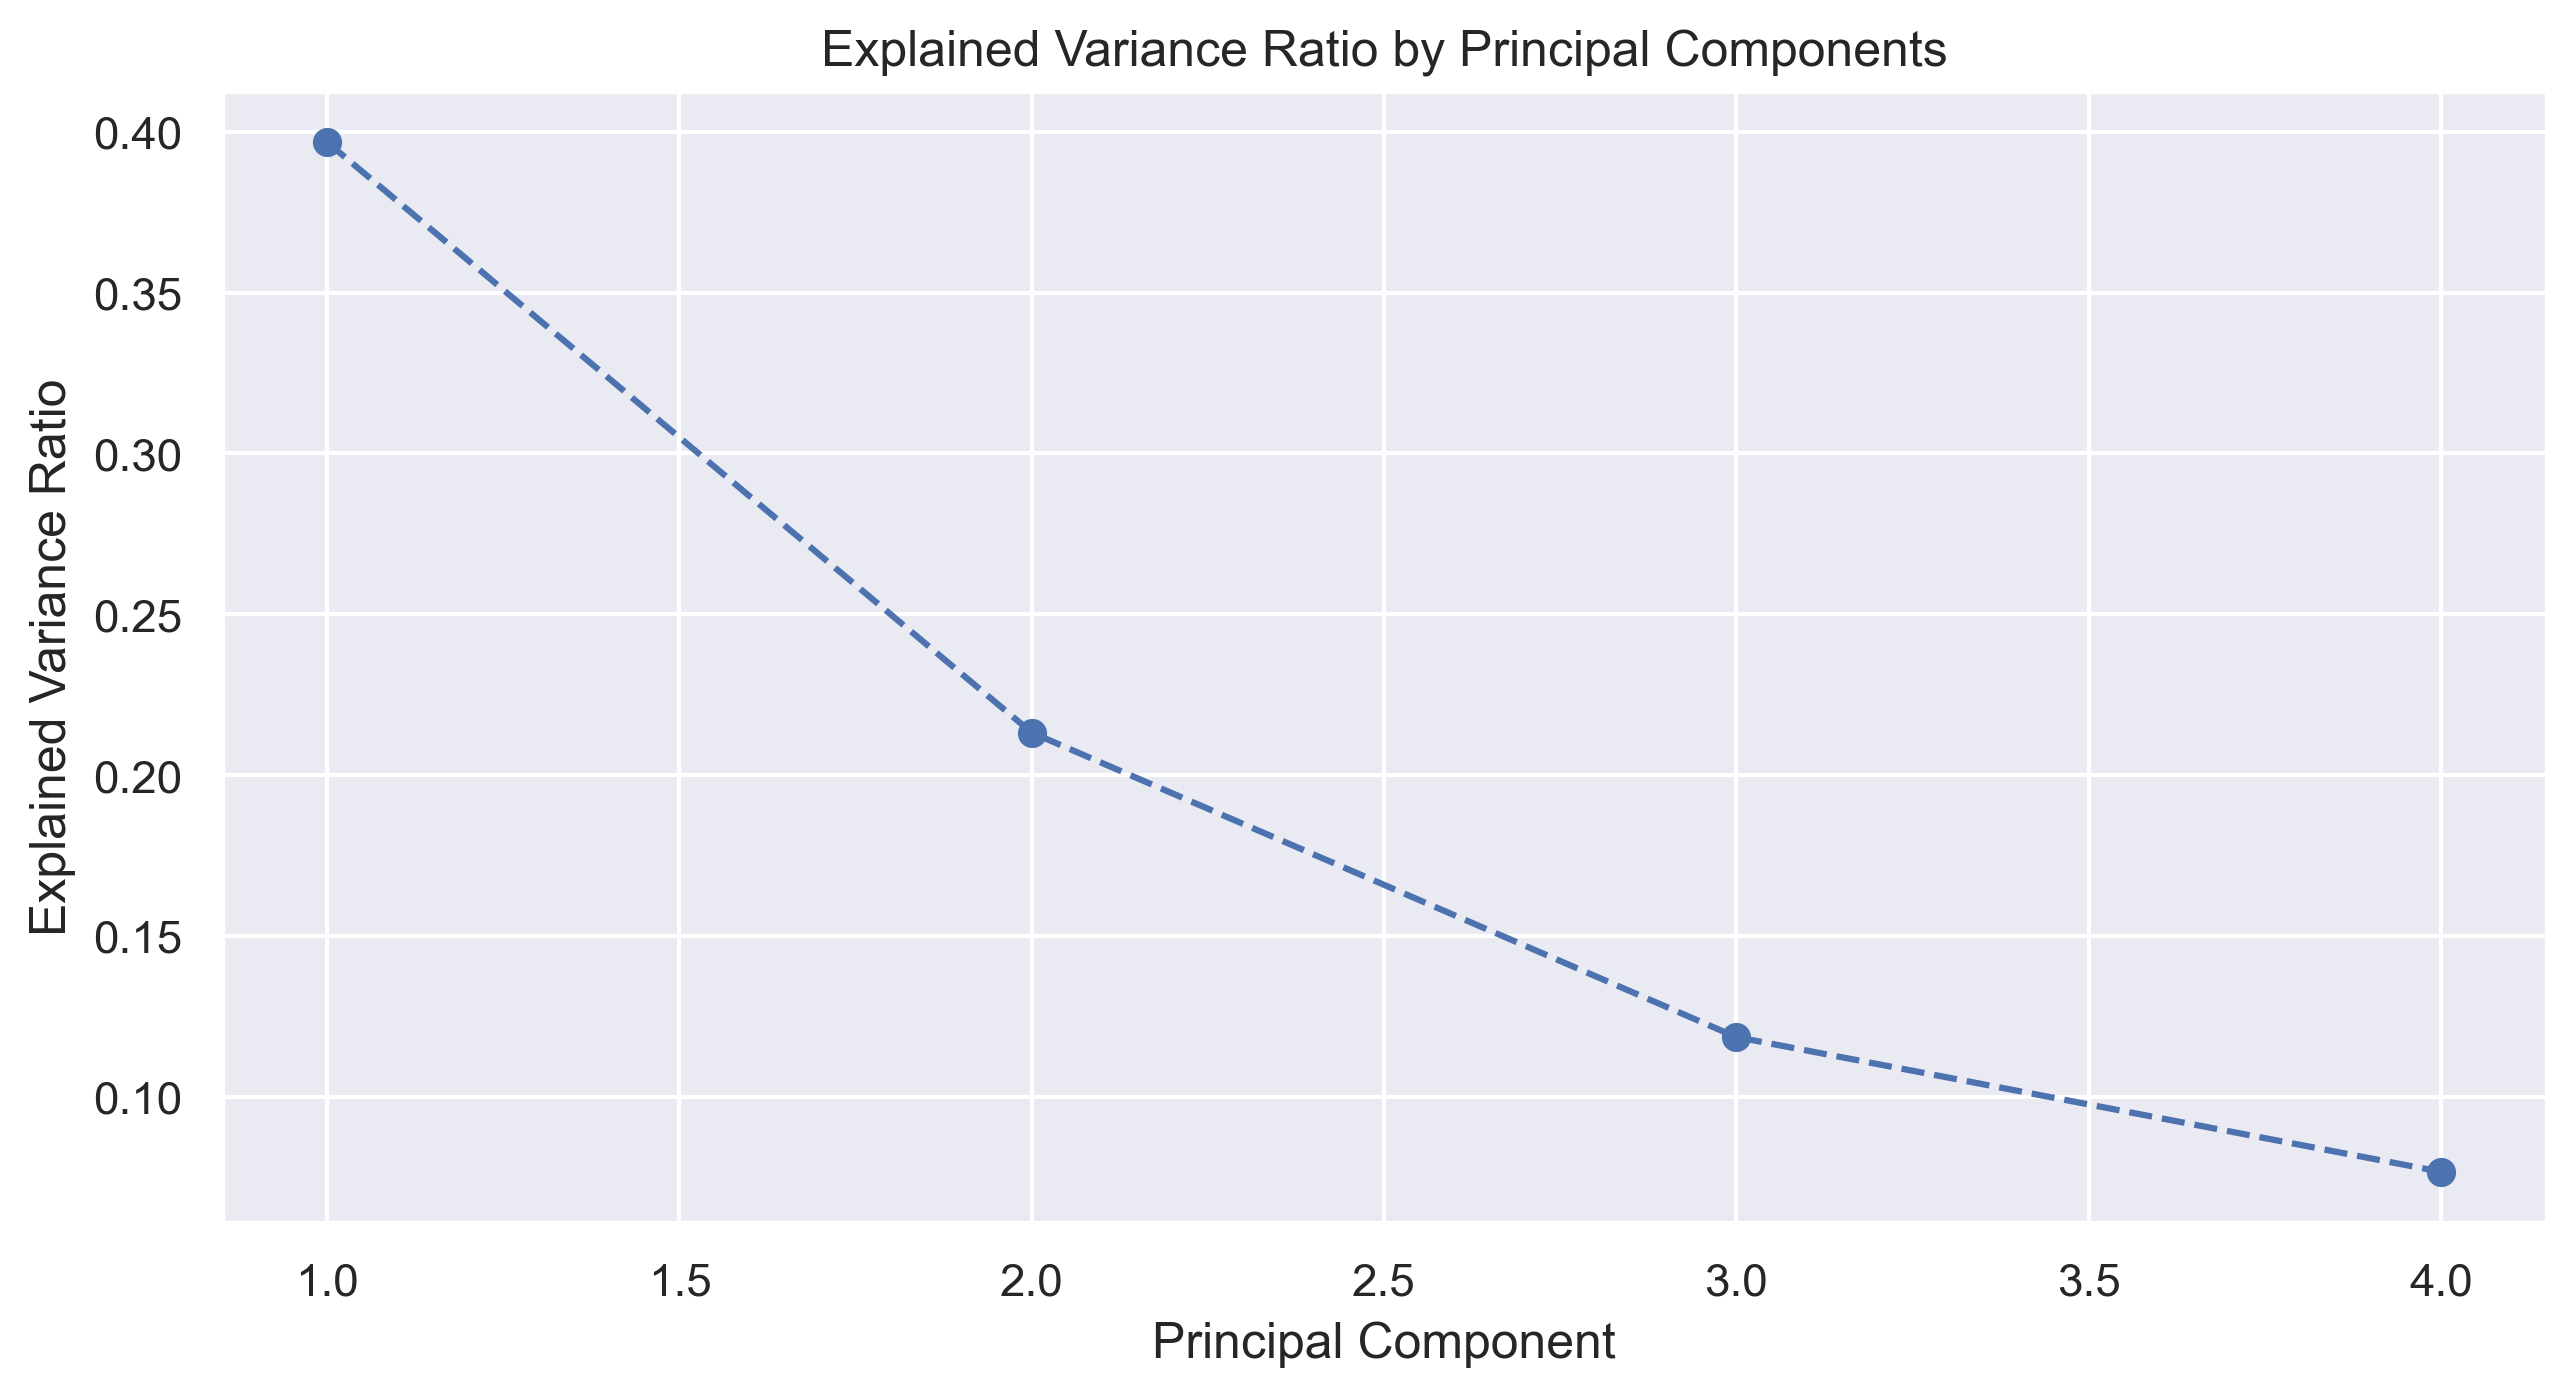

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

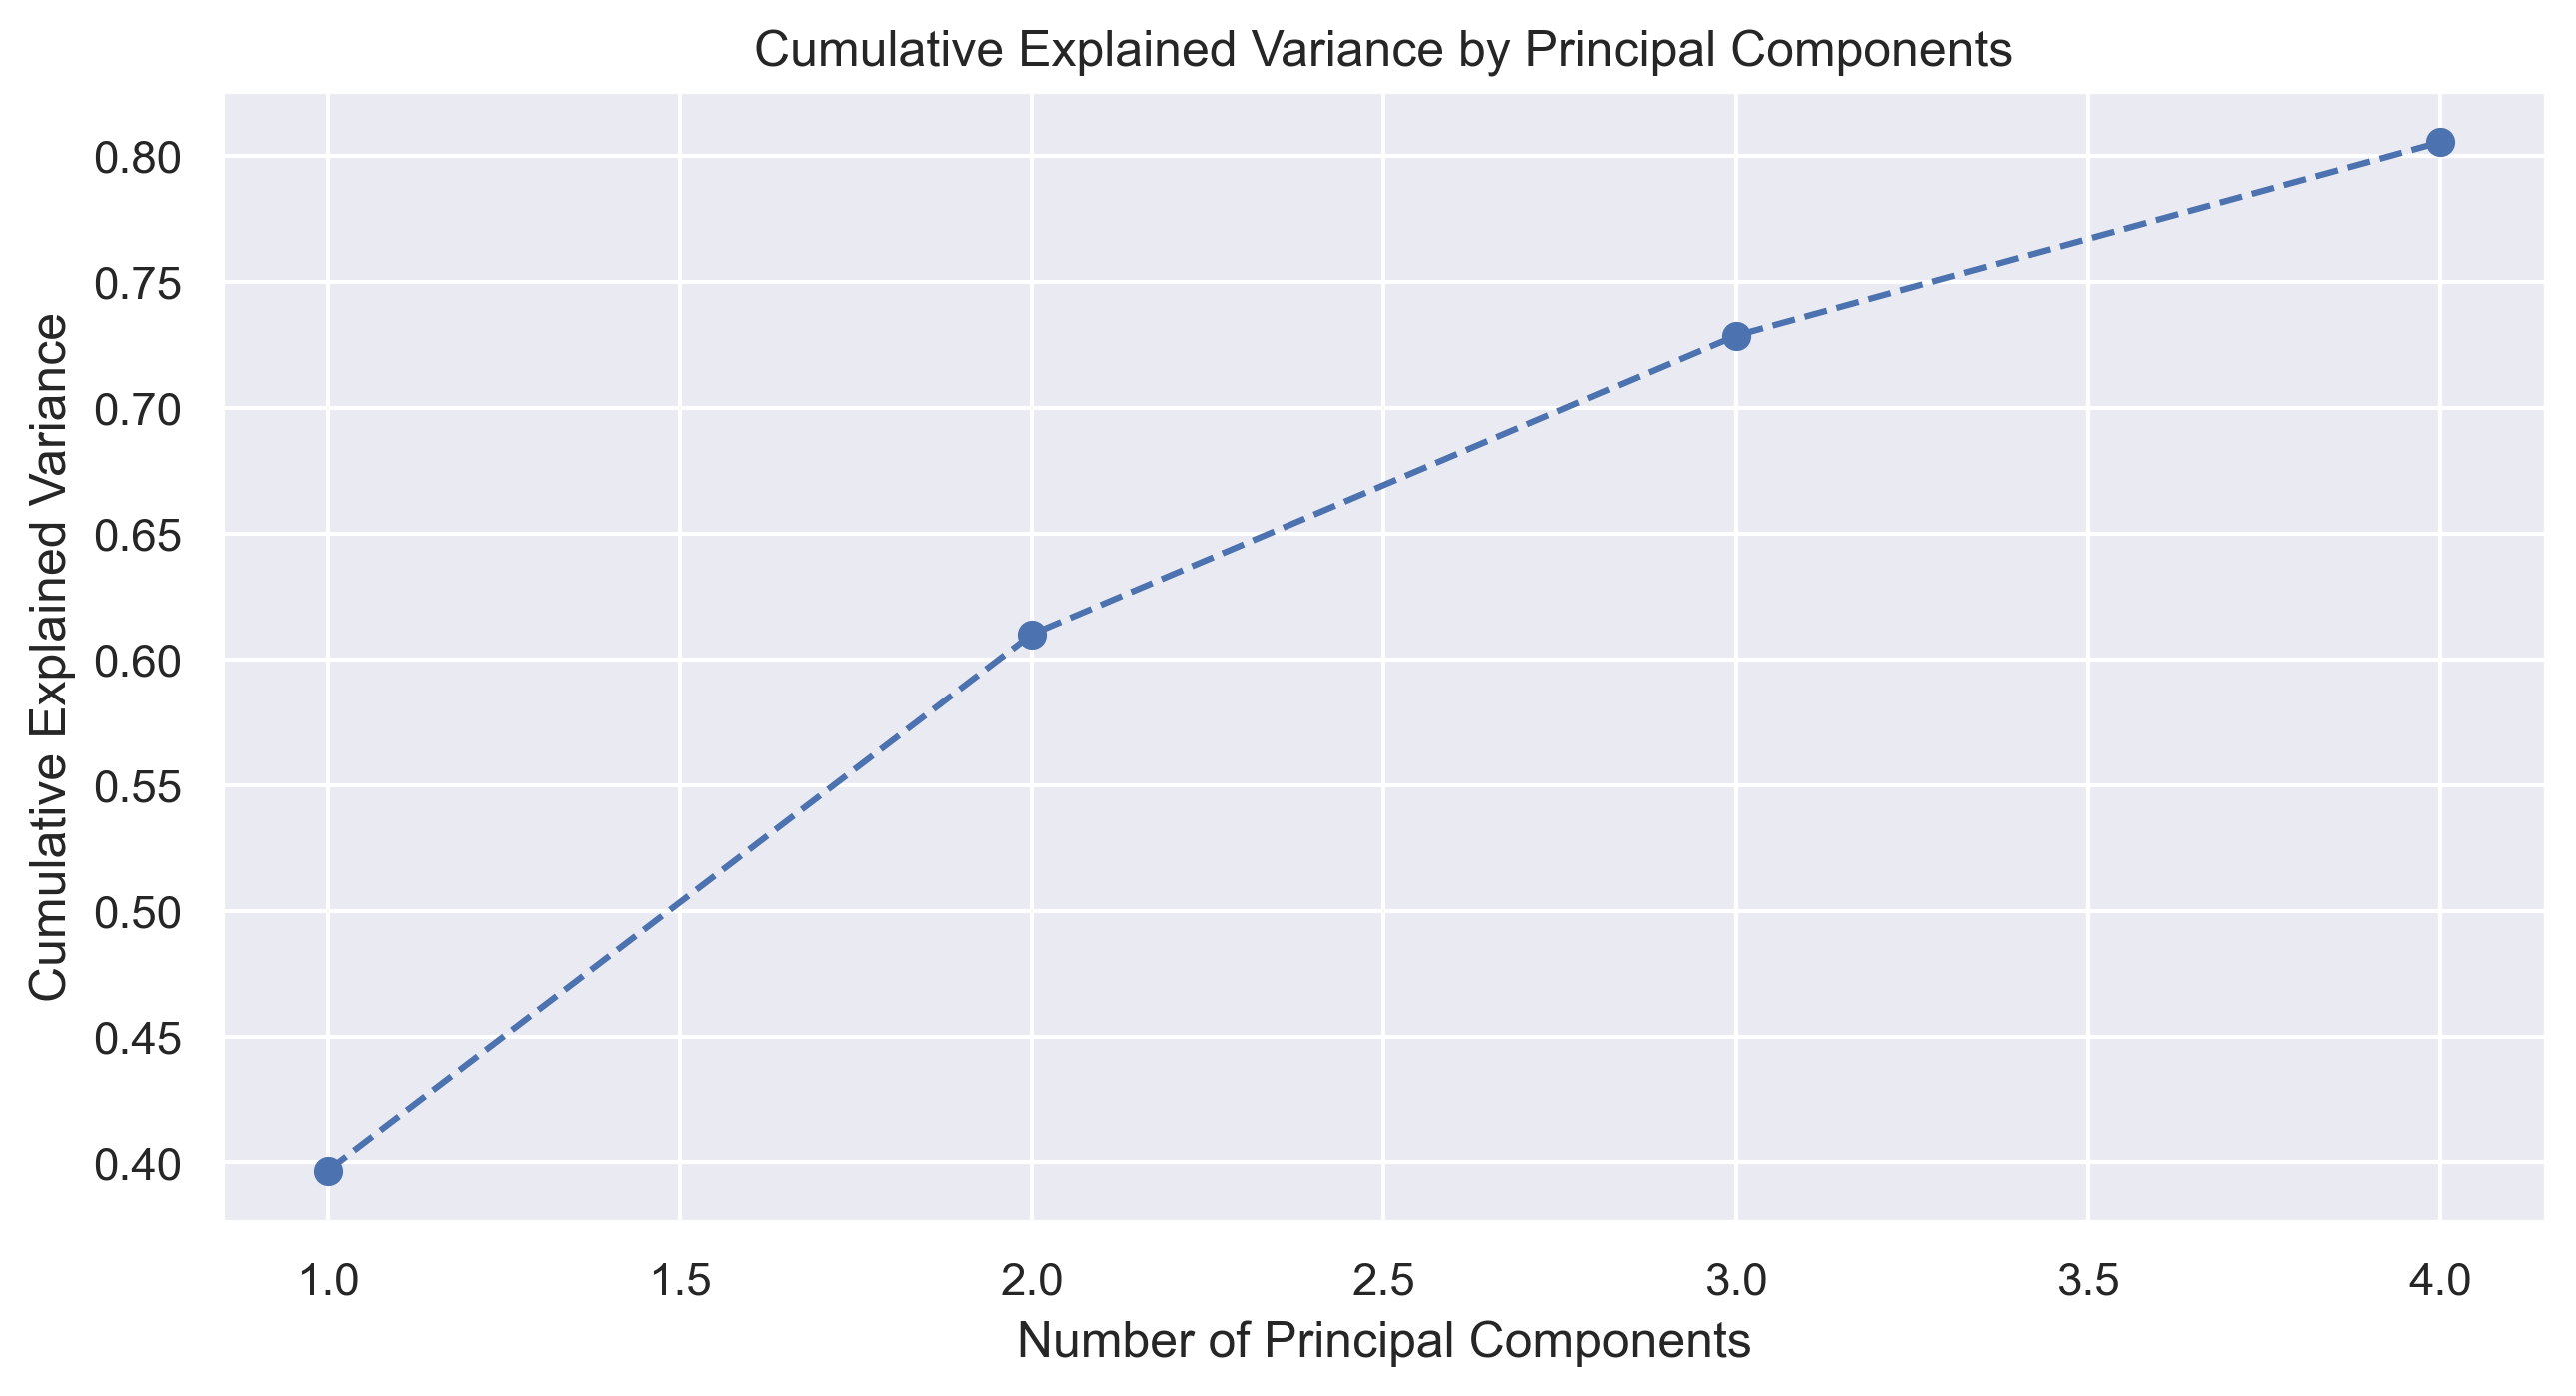

In [51]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Scree plot

Text(0.5, 1.0, 'Scree Plot')

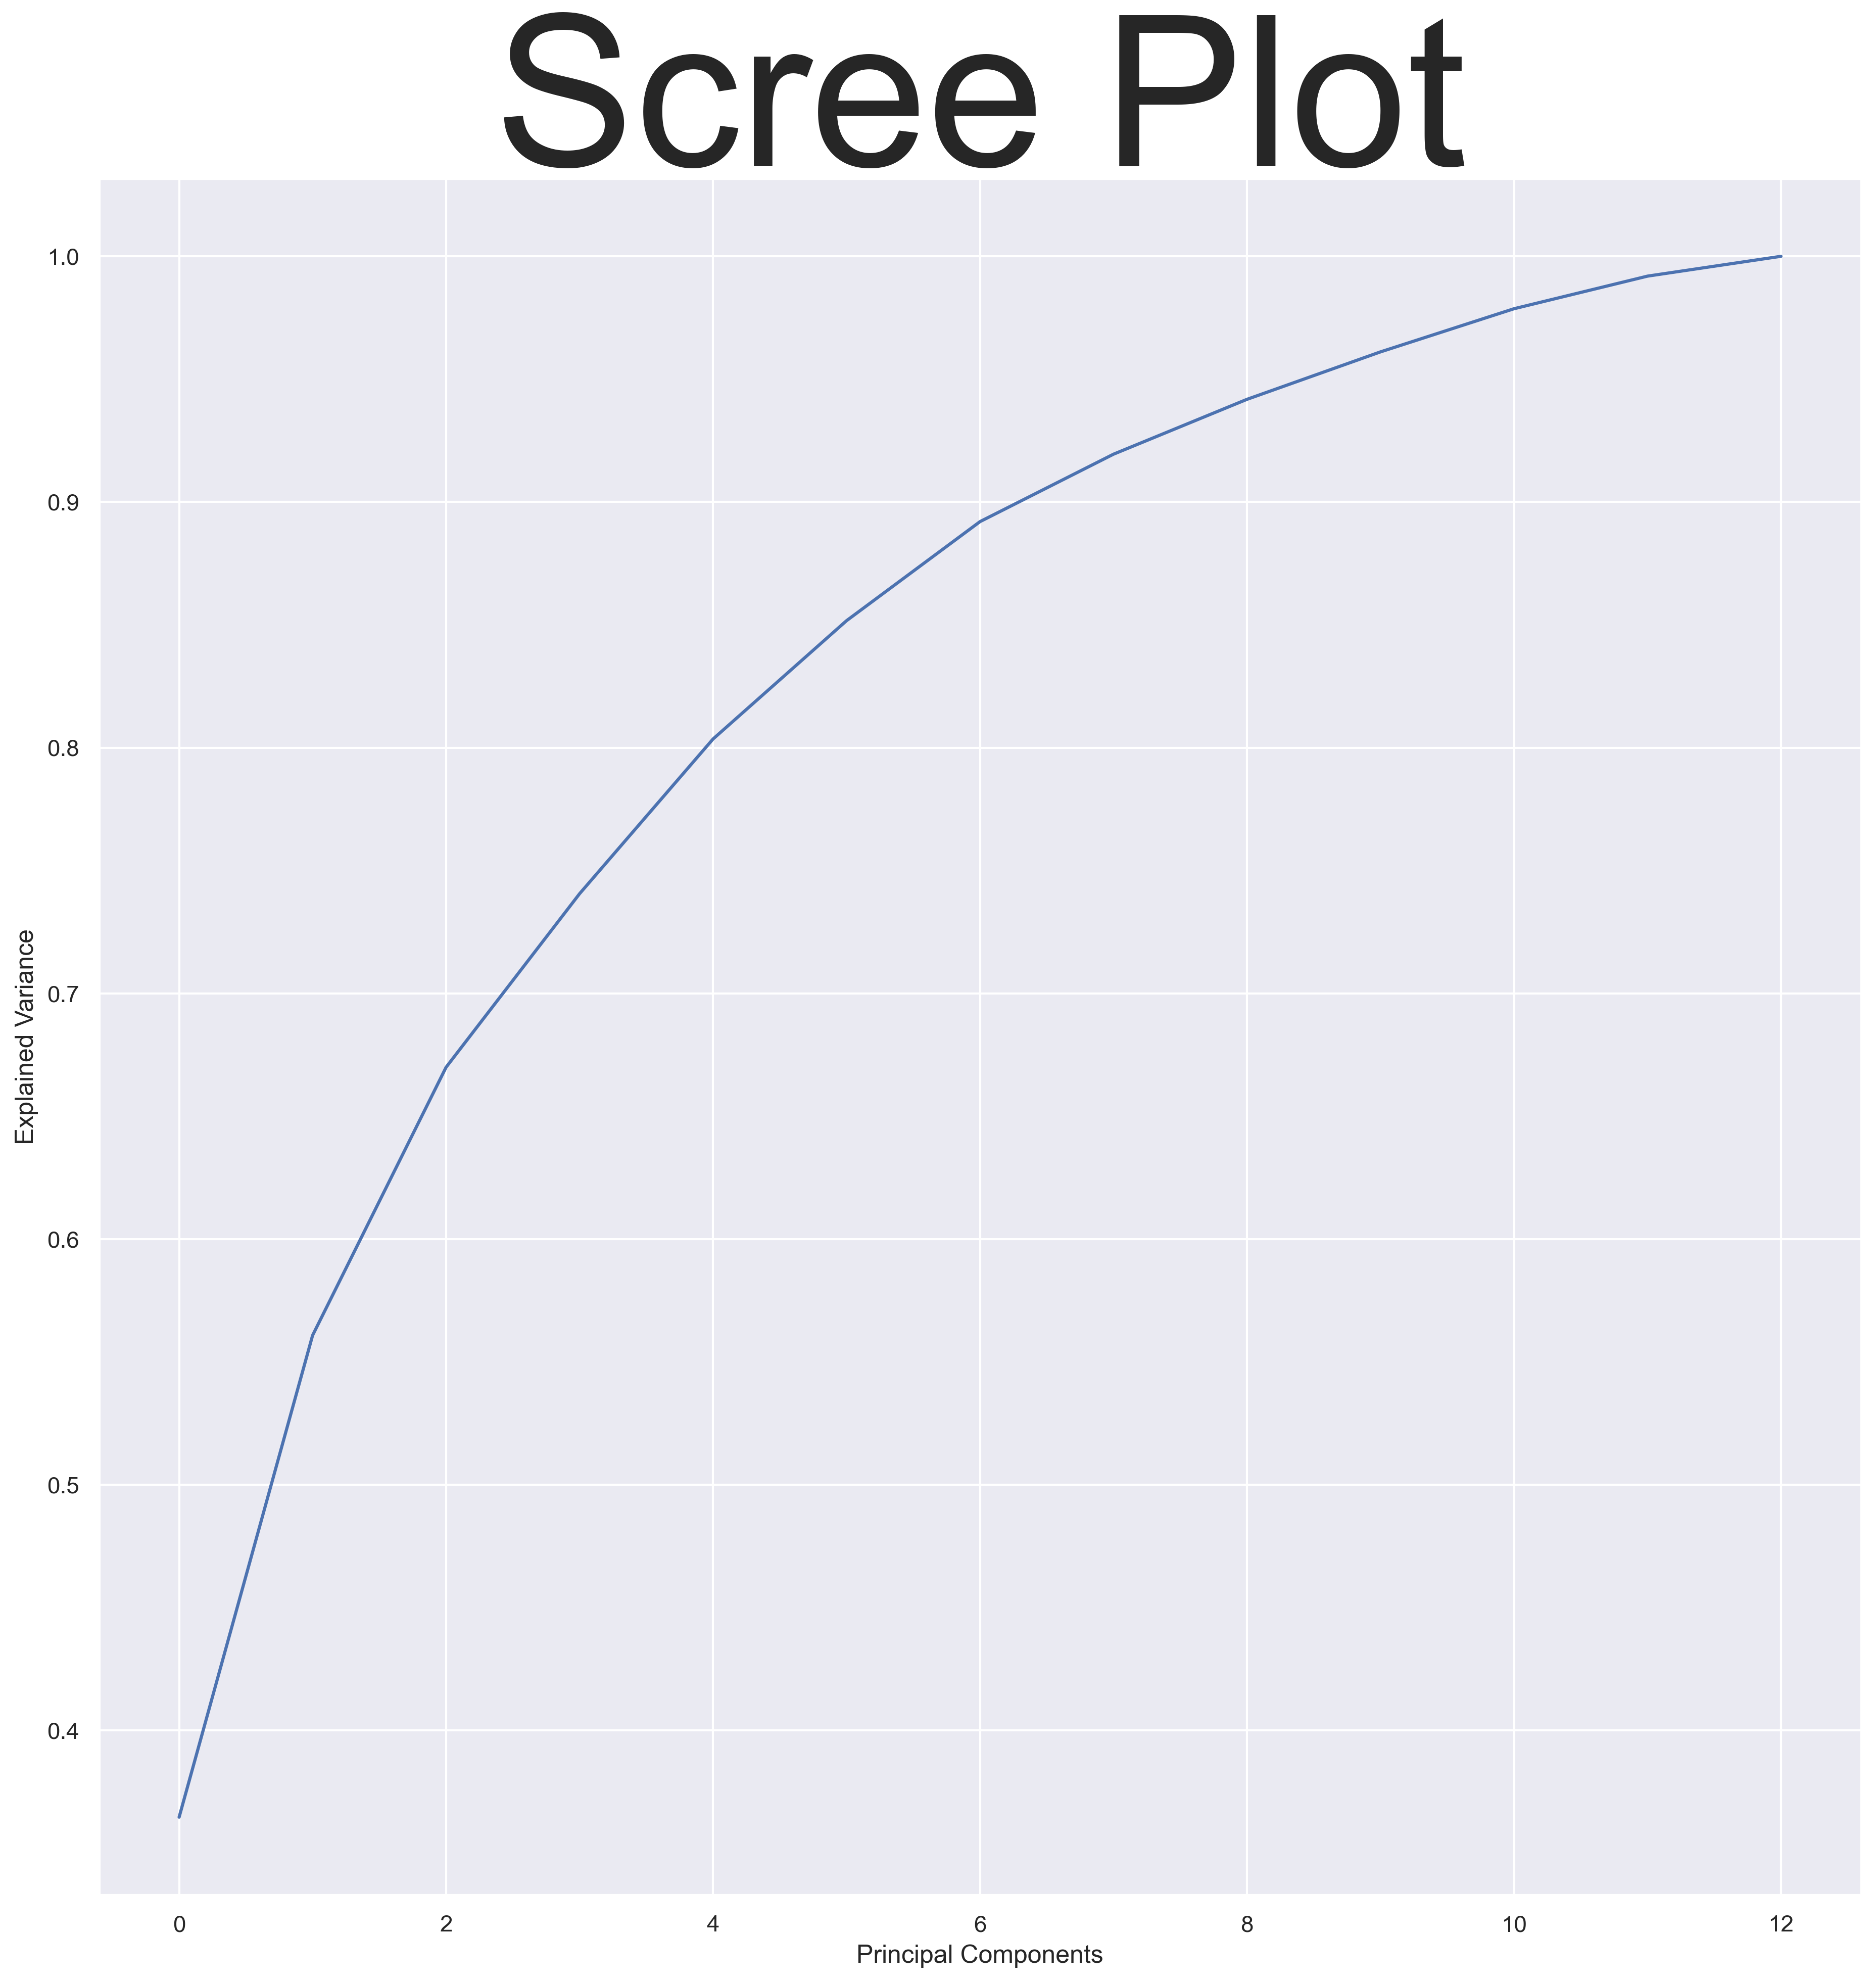

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 100)

In [36]:
#Transform the original dataset into the principal components

In [37]:
pca = PCA(n_components=8)
pcs = pca.fit_transform(x)
pcs

array([[ 3.35814747, -1.52022185, -0.12637492, ..., -0.17664455,
         0.70115415,  0.01918672],
       [ 2.22921481,  0.33326137, -2.04283756, ..., -0.98490211,
         0.04800137,  0.9916492 ],
       [ 2.54005743, -1.03695315,  1.01884481, ...,  0.53766636,
         0.41269113, -0.46440095],
       ...,
       [-2.67116907, -2.86530059, -0.97512583, ...,  0.3541478 ,
         0.85350446,  0.01348408],
       [-2.37160346, -2.39380794, -0.56148477, ...,  1.25232522,
         0.81313133,  0.35102538],
       [-3.22745394, -2.80053456,  1.03090733, ...,  0.23182472,
        -0.13011951, -0.2033248 ]])

In [38]:
data = pd.DataFrame(pcs, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559
...,...,...,...,...,...,...,...,...
173,-3.311751,-2.173369,-0.383365,0.925038,-0.633273,-1.060998,0.685717,-0.130305
174,-2.612425,-1.797712,0.210332,0.398412,0.192034,0.011534,0.136131,-0.565178
175,-2.671169,-2.865301,-0.975126,0.360633,1.185098,0.354148,0.853504,0.013484
176,-2.371603,-2.393808,-0.561485,-0.643948,0.658651,1.252325,0.813131,0.351025


In [39]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
173    3.0
174    3.0
175    3.0
176    3.0
177    3.0
Name: Type, Length: 178, dtype: float64

In [40]:
data['Type']=y

In [41]:
data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Type
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,1.0
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,1.0
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,1.0
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,1.0
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,1.0
...,...,...,...,...,...,...,...,...,...
173,-3.311751,-2.173369,-0.383365,0.925038,-0.633273,-1.060998,0.685717,-0.130305,3.0
174,-2.612425,-1.797712,0.210332,0.398412,0.192034,0.011534,0.136131,-0.565178,3.0
175,-2.671169,-2.865301,-0.975126,0.360633,1.185098,0.354148,0.853504,0.013484,3.0
176,-2.371603,-2.393808,-0.561485,-0.643948,0.658651,1.252325,0.813131,0.351025,3.0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

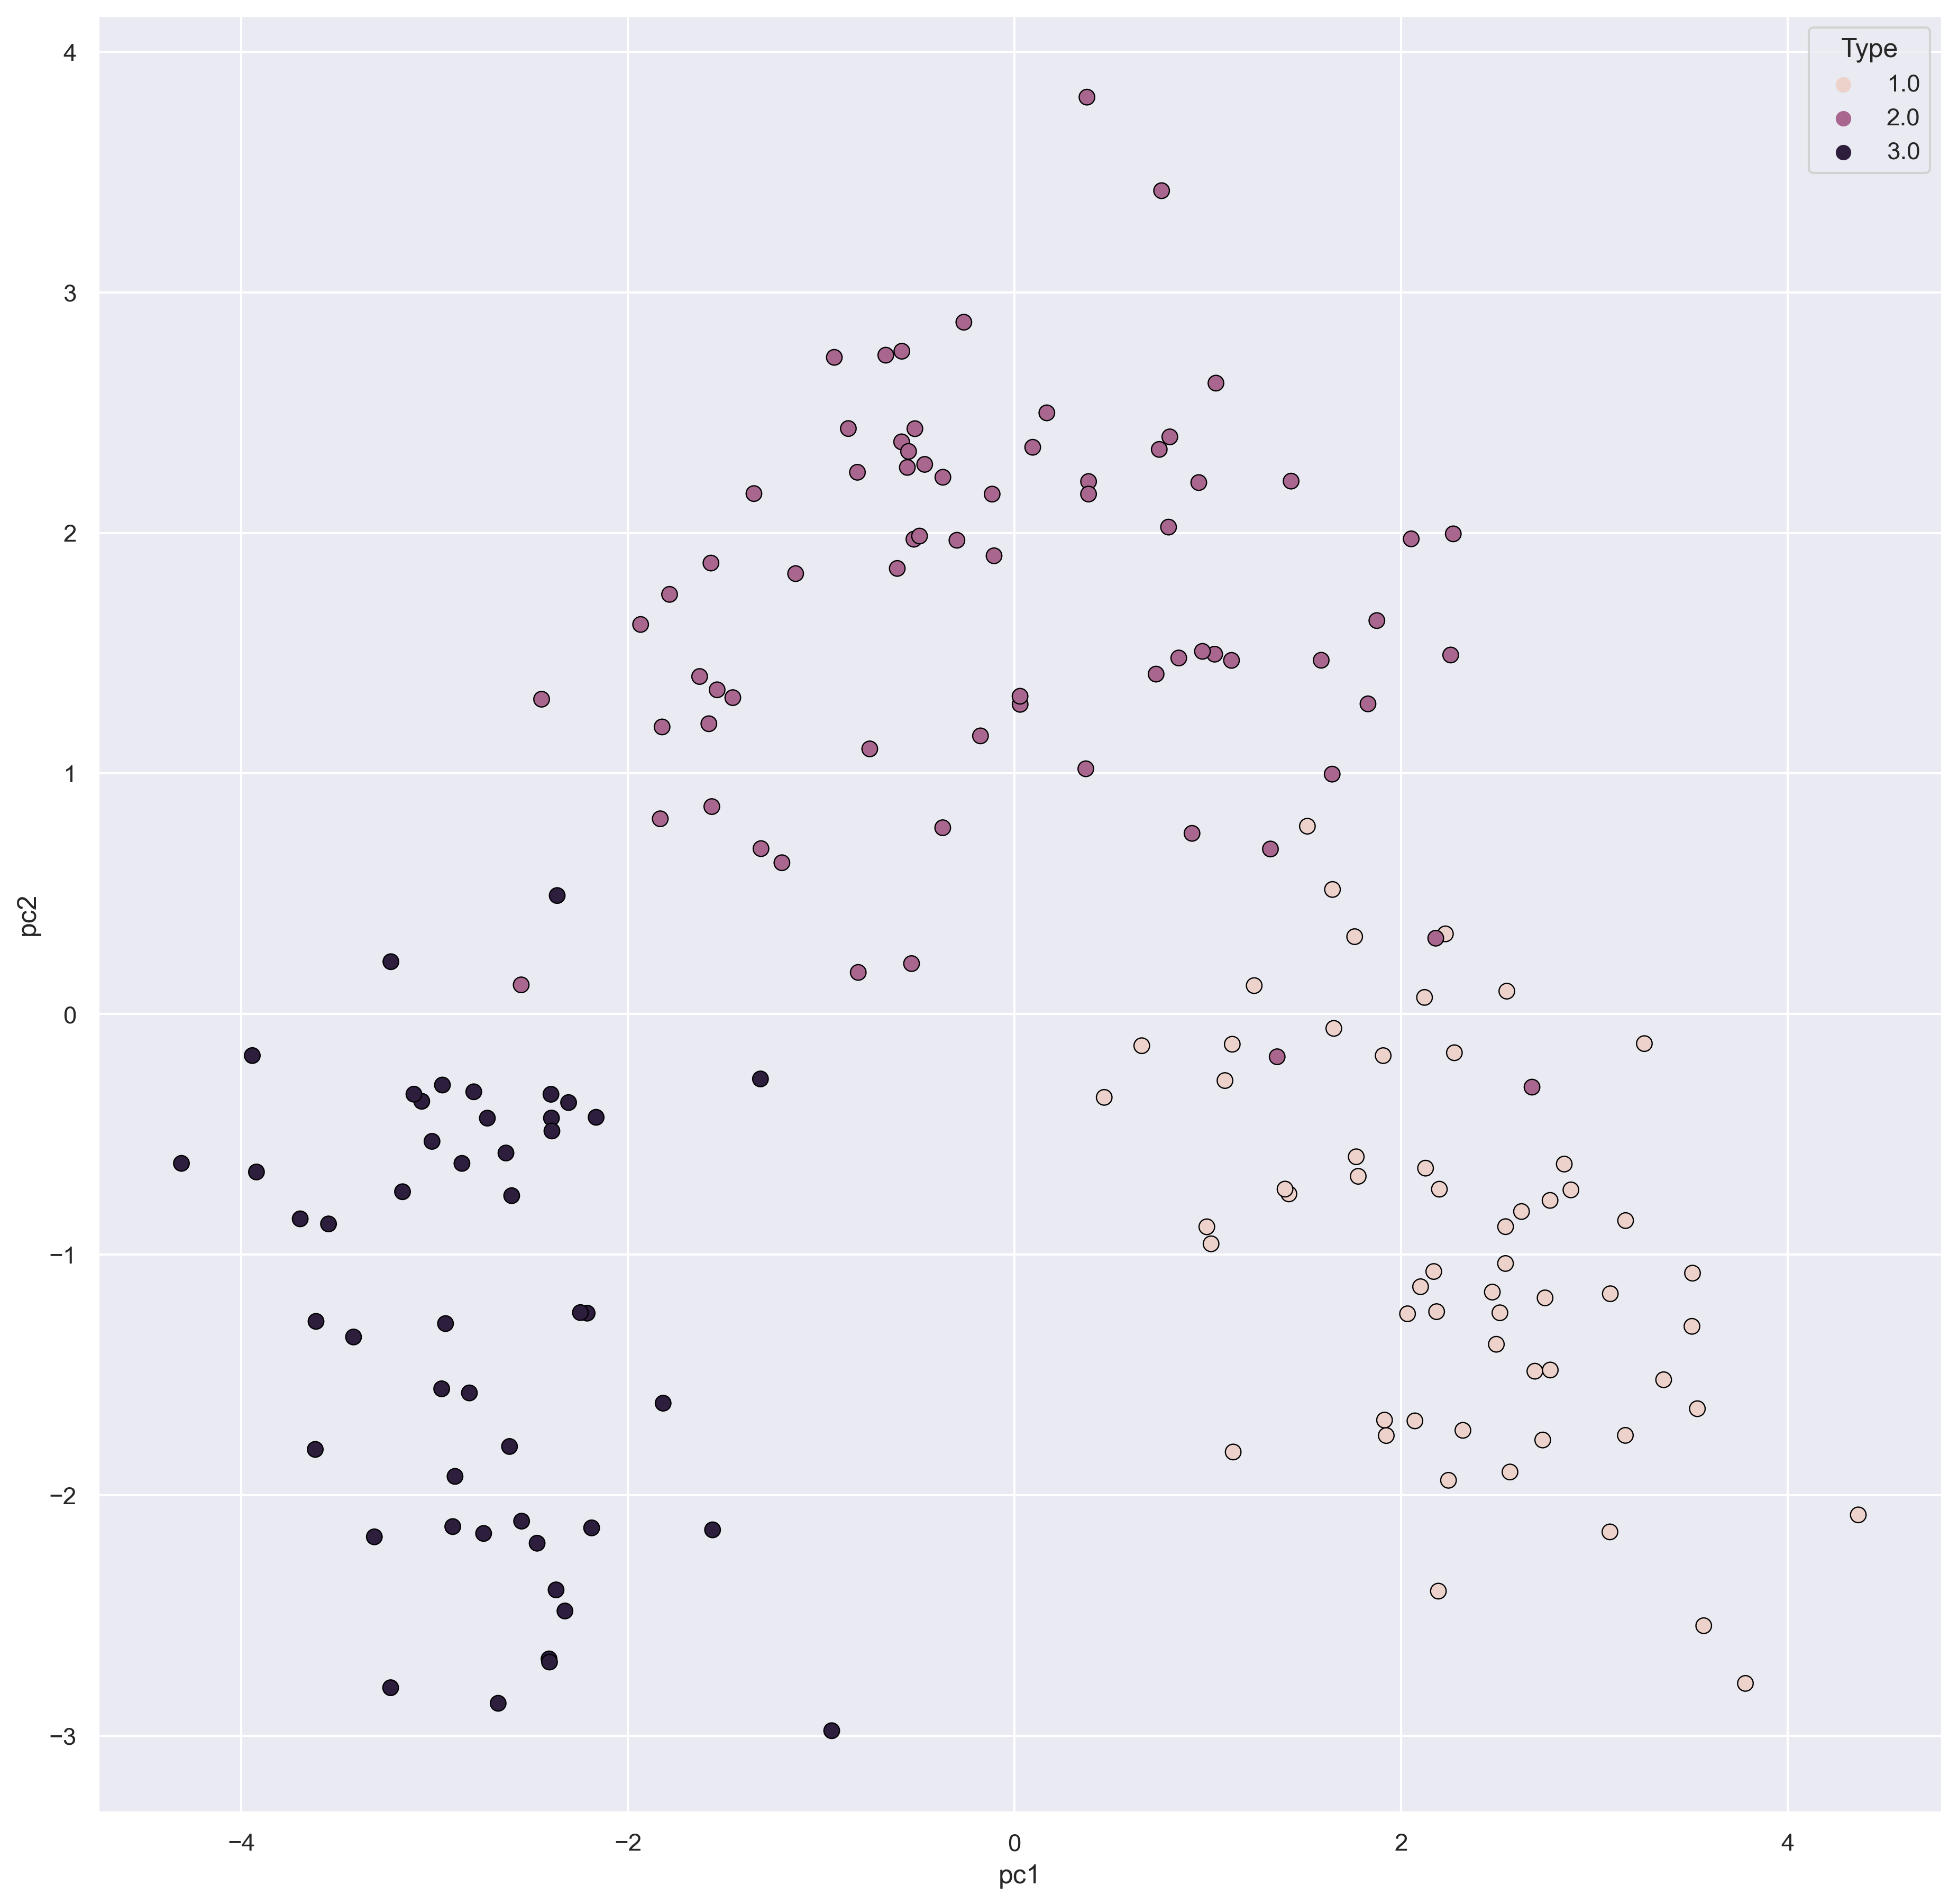

In [42]:
sns.scatterplot(x = data['pc1'], y=data['pc2'],s = 50, edgecolor = 'black',hue=data['Type'])

In [43]:
x = data.iloc[:,:-1]
y = data['Type']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [46]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.92      0.96        13
         3.0       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

